# Gun Violence Spatio-Temporal Analysis, Prediction, and Risk Classification

**Project Overview**

*   **Goal:** Predict gun violence risk level using spatial and temporal data.
*   **Data:** Violence_Reduction_Victims_of_Homicides_and_Non-Fatal_Shootings.csv
*   * from : [ https://data.cityofchicago.org/ ]
    * Dataset Link : [ https://data.cityofchicago.org/api/views/gumc-mgzr/rows.csv?accessType=DOWNLOAD ]
*   **Approach:** Machine learning classification.

**Methodology**

#### Data Preprocessing

*   Cleaning (missing values).
*   Feature Engineering (spatial, temporal, categorical features).
*   Scaling.

#### Exploratory Data Analysis (EDA)

*   Spatial Analysis (hotspots).
*   Temporal Analysis (trends).
*   Feature Relationships.

#### Model Development

*   Models (Logistic Regression, Random Forest, TensorFlow/Keras ).
*   Class Imbalance Handling (SMOTE, etc.).
*   Model Evaluation (Precision, Recall, F1-score, AUC-ROC).

#### Spatio-Temporal Analysis

*   Hotspot Analysis.
*   Temporal Trends.

**Tools**

*   Python, numpy, Pandas, matplotlib, seaborn, Scikit-learn, other relevant libraries.

    


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

## 1. Data Loading and Initial Exploration :

### 1.1. Load the data :

In [3]:
df=pd.read_csv("D:\\Python Tutorials\\Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings.csv")
Violence_Reduction_df=df.copy()

###  1.2. Basic Information :

In [4]:
Violence_Reduction_df.head(10)

CASE_NUMBER                    DATE               BLOCK  \
0    JF167335  03/08/2022 03:27:00 PM  6000 N KENMORE AVE   
1    JG148375  02/11/2023 02:30:00 AM   8400 S WABASH AVE   
2    JD438266  11/21/2020 10:15:00 PM  7900 S BRANDON AVE   
3    JH317789  06/23/2024 08:11:00 AM  12300 S HALSTED ST   
4    JH317789  06/23/2024 08:11:00 AM  12300 S HALSTED ST   
5    JH332516  07/04/2024 01:01:00 AM    6200 S LAFLIN ST   
6    JH242715  04/28/2024 10:54:00 PM   8800 S BURLEY AVE   
7    JJ116681  01/16/2025 04:55:00 AM  5800 W NEWPORT AVE   
8    JJ116721  01/16/2025 07:35:00 AM  4100 W GRENSHAW ST   
9    JJ117484  01/16/2025 05:55:00 PM      2000 W 47TH ST   

  VICTIMIZATION_PRIMARY INCIDENT_PRIMARY GUNSHOT_INJURY_I        UNIQUE_ID  \
0              HOMICIDE         HOMICIDE               NO  HOM-JF167335-#1   
1              HOMICIDE         HOMICIDE              YES  HOM-JG148375-#1   
2              HOMICIDE         HOMICIDE              YES  HOM-JD438266-#1   
3              HOMICIDE         HOMICIDE              YES  HOM-JH317789-#1   
4              HOMICIDE         HOMICIDE              YES  HOM-JH317789-#2   
5              HOMICIDE         HOMICIDE              YES  HOM-JH332516-#1   
6              HOMICIDE         HOMICIDE              YES  HOM-JH242715-#1   
7              HOMICIDE         HOMICIDE              YES  HOM-JJ116681-#1   
8              HOMICIDE         HOMICIDE              YES  HOM-JJ116721-#1   
9              HOMICIDE         HOMICIDE              YES  HOM-JJ117484-#1   

   ZIP_CODE  WARD  COMMUNITY_AREA  ... MONTH  DAY_OF_WEEK  HOUR  \
0   60660.0  48.0       EDGEWATER  ...     3            3    15   
1   60619.0   6.0         CHATHAM  ...     2            7     2   
2   60617.0   7.0   SOUTH CHICAGO  ...    11            7    22   
3   60628.0   9.0    WEST PULLMAN  ...     6            1     8   
4   60628.0   9.0    WEST PULLMAN  ...     6            1     8   
5   60636.0  16.0  WEST ENGLEWOOD  ...     7            5     1   
6   60617.0  10.0   SOUTH CHICAGO  ...     4            1    22   
7   60634.0  30.0    PORTAGE PARK  ...     1            5     4   
8   60624.0  24.0  NORTH LAWNDALE  ...     1            5     7   
9   60609.0  15.0        NEW CITY  ...     1            5    17   

   LOCATION_DESCRIPTION STATE_HOUSE_DISTRICT STATE_SENATE_DISTRICT  \
0             APARTMENT                 14.0                   7.0   
1                 ALLEY                 34.0                  17.0   
2                STREET                 25.0                  13.0   
3                STREET                 28.0                  14.0   
4                STREET                 28.0                  14.0   
5                  YARD                  6.0                   3.0   
6                STREET                 25.0                  13.0   
7             APARTMENT                 39.0                  20.0   
8                 PORCH                  9.0                   5.0   
9                 ALLEY                  2.0                   1.0   

                  UPDATED   LATITUDE  LONGITUDE  \
0  02/24/2023 05:55:43 AM  41.990570 -87.657000   
1  02/12/2023 05:09:11 AM  41.739900 -87.622860   
2  01/30/2025 05:49:40 AM  41.750567 -87.547249   
3  01/30/2025 05:40:06 AM  41.670653 -87.641779   
4  01/30/2025 05:40:14 AM  41.670653 -87.641779   
5  01/30/2025 05:54:02 AM  41.780047 -87.662229   
6  04/30/2024 05:26:32 AM  41.733280 -87.545900   
7  01/17/2025 05:48:48 AM  41.943673 -87.771971   
8  01/29/2025 06:15:51 AM  41.867623 -87.729181   
9  01/19/2025 05:18:43 AM  41.807897 -87.675051   

                                   LOCATION  
0                POINT (-87.657 41.9905705)  
1              POINT (-87.62286 41.7399005)  
2  POINT (-87.547249058699 41.750566904142)  
3  POINT (-87.641779058699 41.670653095858)  
4  POINT (-87.641779058699 41.670653095858)  
5  POINT (-87.662229058699 41.780046904142)  
6               POINT (-87.5459 41.7332805)  
7  POINT (-87.771970941301 41.94

#### 1.2.1 Select the columns that want to keep :

In [5]:
Violence_Reduction_df = Violence_Reduction_df[['DATE','LATITUDE','LONGITUDE','VICTIMIZATION_PRIMARY','LOCATION_DESCRIPTION',
                                               'WARD','AGE','SEX','RACE','GUNSHOT_INJURY_I']]

In [6]:
Violence_Reduction_df.head()

DATE   LATITUDE  LONGITUDE VICTIMIZATION_PRIMARY  \
0  03/08/2022 03:27:00 PM  41.990570 -87.657000              HOMICIDE   
1  02/11/2023 02:30:00 AM  41.739900 -87.622860              HOMICIDE   
2  11/21/2020 10:15:00 PM  41.750567 -87.547249              HOMICIDE   
3  06/23/2024 08:11:00 AM  41.670653 -87.641779              HOMICIDE   
4  06/23/2024 08:11:00 AM  41.670653 -87.641779              HOMICIDE   

  LOCATION_DESCRIPTION  WARD    AGE SEX RACE GUNSHOT_INJURY_I  
0            APARTMENT  48.0  60-69   M  BLK               NO  
1                ALLEY   6.0  20-29   M  API              YES  
2               STREET   7.0  30-39   M  BLK              YES  
3               STREET   9.0  20-29   M  BLK              YES  
4               STREET   9.0  20-29   M  BLK              YES

In [7]:
Violence_Reduction_df.shape

(61079, 10)

In [8]:
Violence_Reduction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61079 entries, 0 to 61078
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   61079 non-null  object 
 1   LATITUDE               61075 non-null  float64
 2   LONGITUDE              61075 non-null  float64
 3   VICTIMIZATION_PRIMARY  61079 non-null  object 
 4   LOCATION_DESCRIPTION   61079 non-null  object 
 5   WARD                   61075 non-null  float64
 6   AGE                    61079 non-null  object 
 7   SEX                    61079 non-null  object 
 8   RACE                   61079 non-null  object 
 9   GUNSHOT_INJURY_I       61079 non-null  object 
dtypes: float64(3), object(7)
memory usage: 4.7+ MB


In [9]:
Violence_Reduction_df.describe()

LATITUDE     LONGITUDE          WARD
count  61075.000000  61075.000000  61075.000000
mean      41.817867    -87.668224     19.893475
std        0.077451      0.056060     10.948226
min       41.644151    -87.846051      1.000000
25%       41.759358    -87.713827      9.000000
50%       41.805627    -87.665821     20.000000
75%       41.880385    -87.625501     27.000000
max       42.023220    -87.524801     50.000000

### 1.3. Inspecting Categorical Columns :

In [10]:
for col in Violence_Reduction_df.select_dtypes(include=['object']):
    print(f"Column '{col}':")
    print(Violence_Reduction_df[col].unique())
    print("-" * 80)

Column 'DATE':
['03/08/2022 03:27:00 PM' '02/11/2023 02:30:00 AM'
 '11/21/2020 10:15:00 PM' ... '01/28/2025 04:50:00 AM'
 '01/28/2025 09:11:00 AM' '01/27/2025 05:16:00 AM']
--------------------------------------------------------------------------------
Column 'VICTIMIZATION_PRIMARY':
['HOMICIDE' 'BATTERY' 'ROBBERY' 'NON-FATAL' 'CRIMINAL SEXUAL ASSAULT'
 'PUBLIC PEACE VIOLATION']
--------------------------------------------------------------------------------
Column 'LOCATION_DESCRIPTION':
['APARTMENT' 'ALLEY' 'STREET' 'YARD' 'PORCH' 'VEHICLE NON-COMMERCIAL'
 'RESIDENCE - YARD (FRONT / BACK)' 'SIDEWALK' 'GAS STATION'
 'LAKEFRONT / WATERFRONT / RIVERBANK' 'AUTO' 'TAVERN / LIQUOR STORE'
 'PARKING LOT / GARAGE (NON RESIDENTIAL)' 'BASEMENT' 'PARK PROPERTY'
 'SCHOOL - PUBLIC GROUNDS' 'RESIDENCE' 'HOUSE' 'VACANT LOT'
 'CHA PARKING LOT / GROUNDS' 'VACANT LOT / LAND' 'RESIDENCE - GARAGE'
 'RAILROAD PROPERTY' 'OFFICE' 'STAIRWELL' 'RESTAURANT' 'GANGWAY'
 'CHA LOBBY' 'CHA HALLWAY' 'CHA APARTMENT'

### 1.4. Checking for Duplicates :

In [11]:
Violence_Reduction_df.duplicated().sum()

3086

In [12]:
Violence_Reduction_df.drop_duplicates(inplace=True)

In [13]:
Violence_Reduction_df.duplicated().sum()

0

### 1.5. Visualizations (Initial) :

#### 1.5.1. Histograms for Numerical columns :

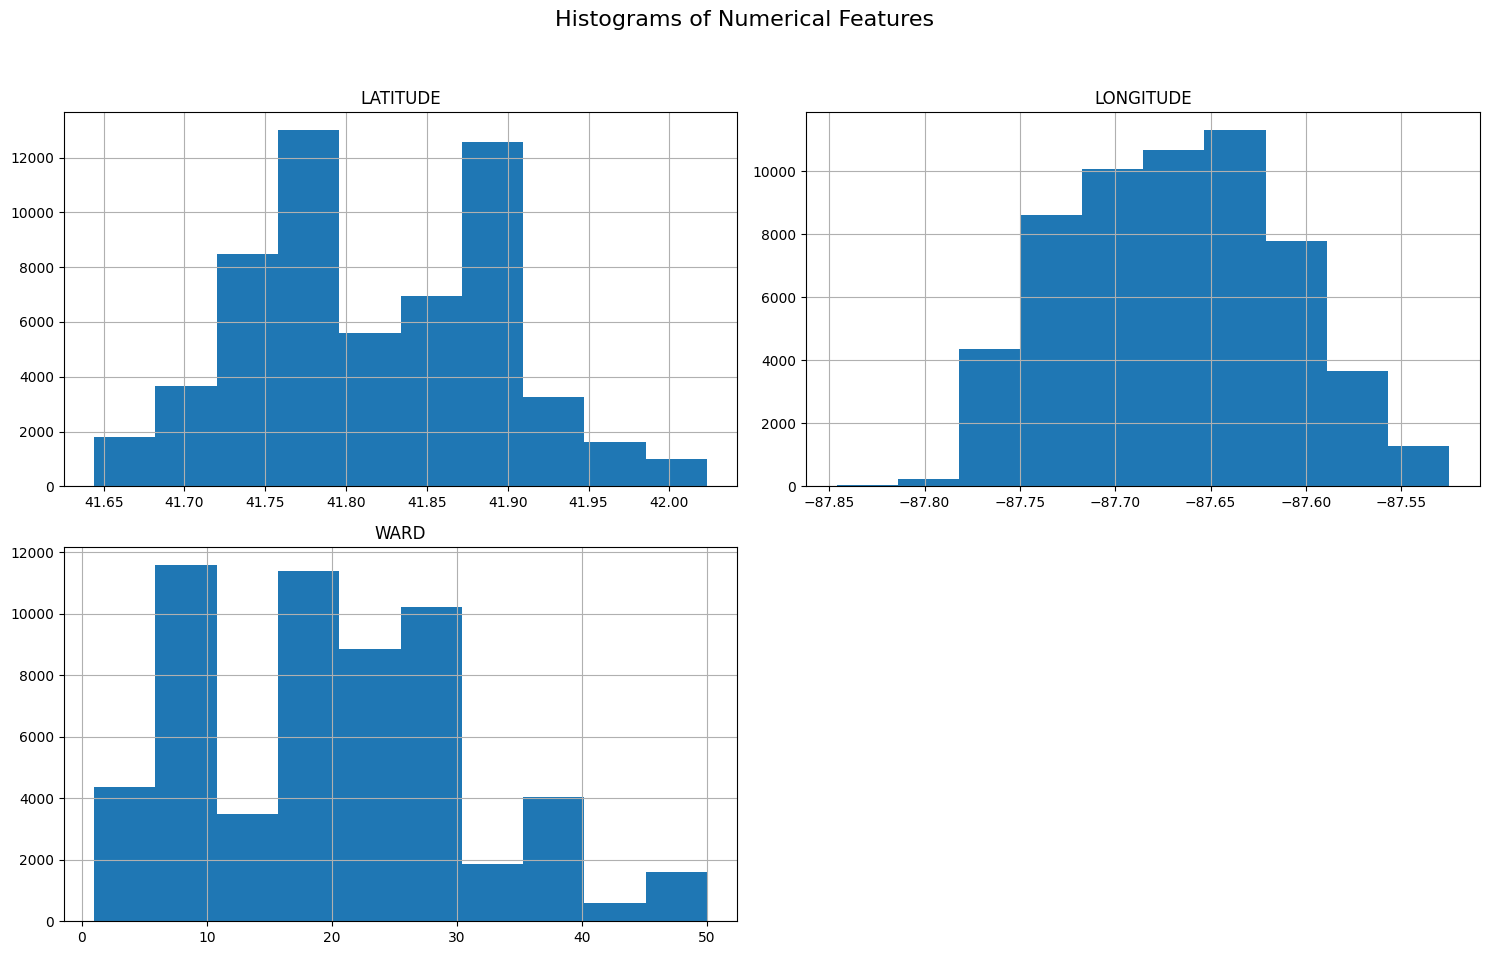

In [14]:
numerical_cols = Violence_Reduction_df.select_dtypes(include=np.number).columns
if not numerical_cols.empty:
    Violence_Reduction_df[numerical_cols].hist(figsize=(15, 10)) 
    plt.suptitle("Histograms of Numerical Features", fontsize=16) 
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    plt.show()
else:
    print("\nNo numerical columns found in the dataset..!!")

#### 1.5.2. Bar plots for Categorical columns :

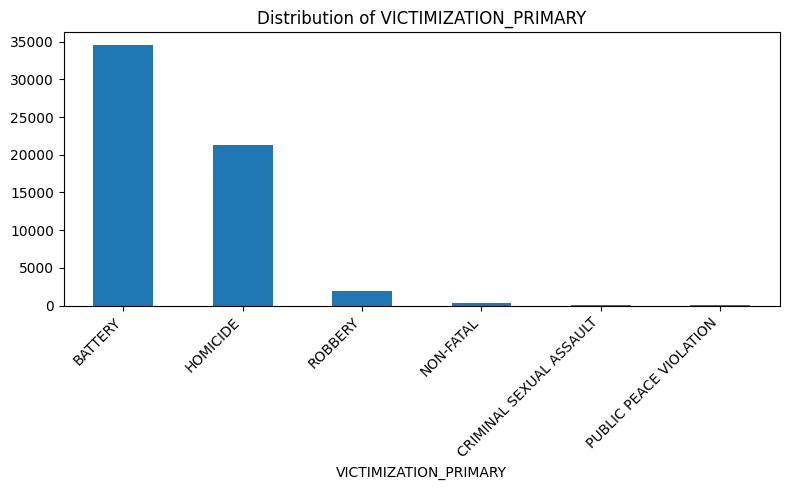

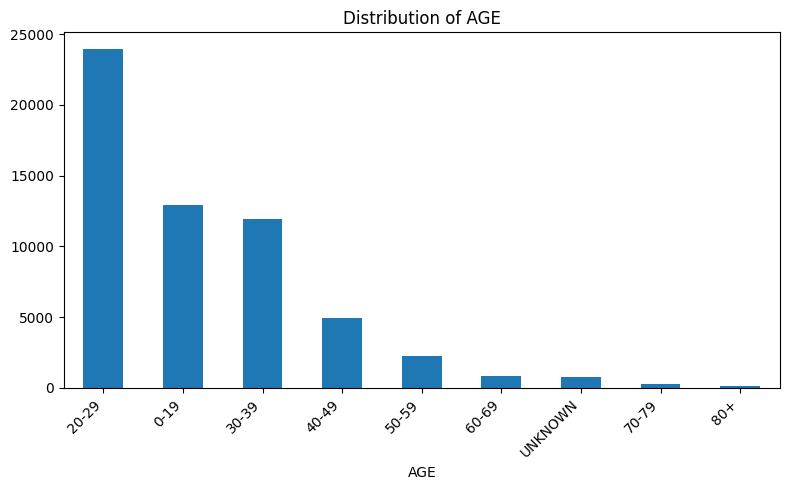

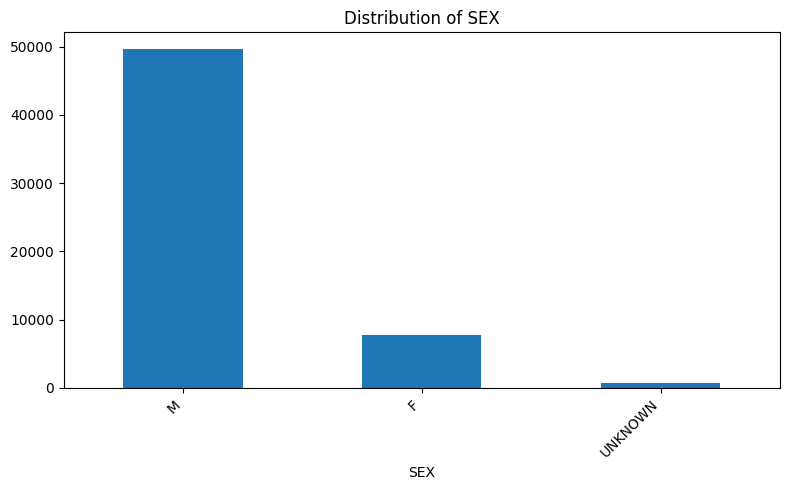

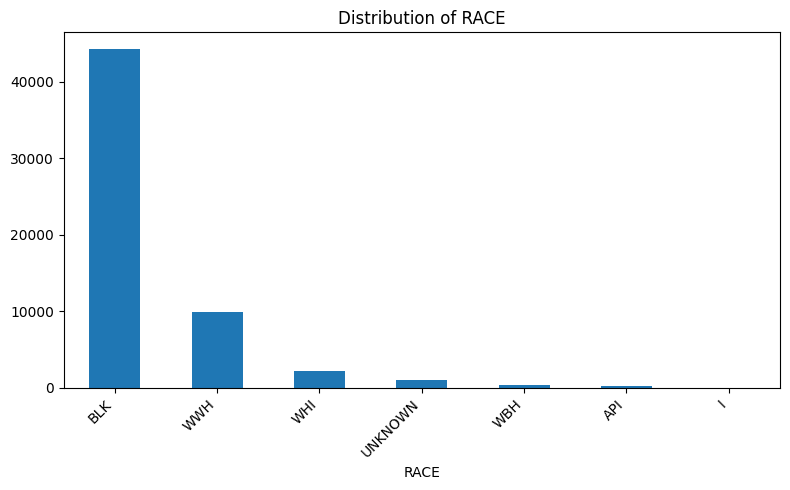

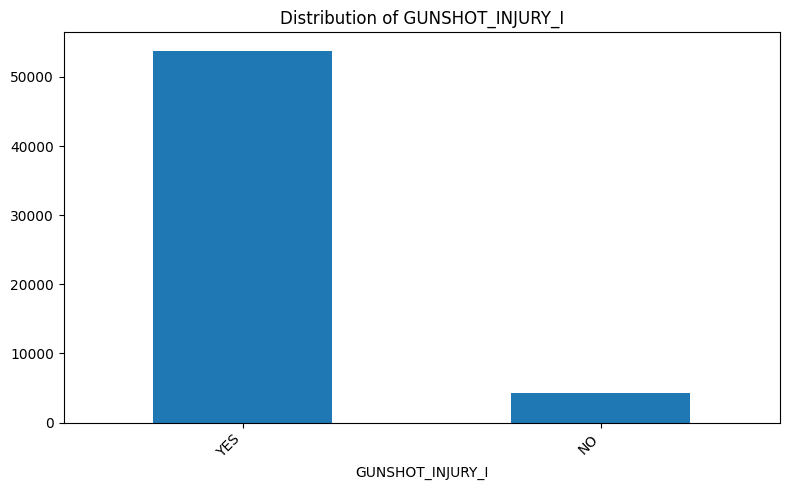

In [15]:
categorical_cols = Violence_Reduction_df[['VICTIMIZATION_PRIMARY','AGE','SEX','RACE','GUNSHOT_INJURY_I']]
if not categorical_cols.empty:
    for col in categorical_cols:
        plt.figure(figsize=(8, 5)) 
        Violence_Reduction_df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')  
        plt.tight_layout() 
        plt.show()
else:
    print("\nNo categorical columns found in the dataset..!!")

#### 1.5.3. Check for correlations (Numerical data) :

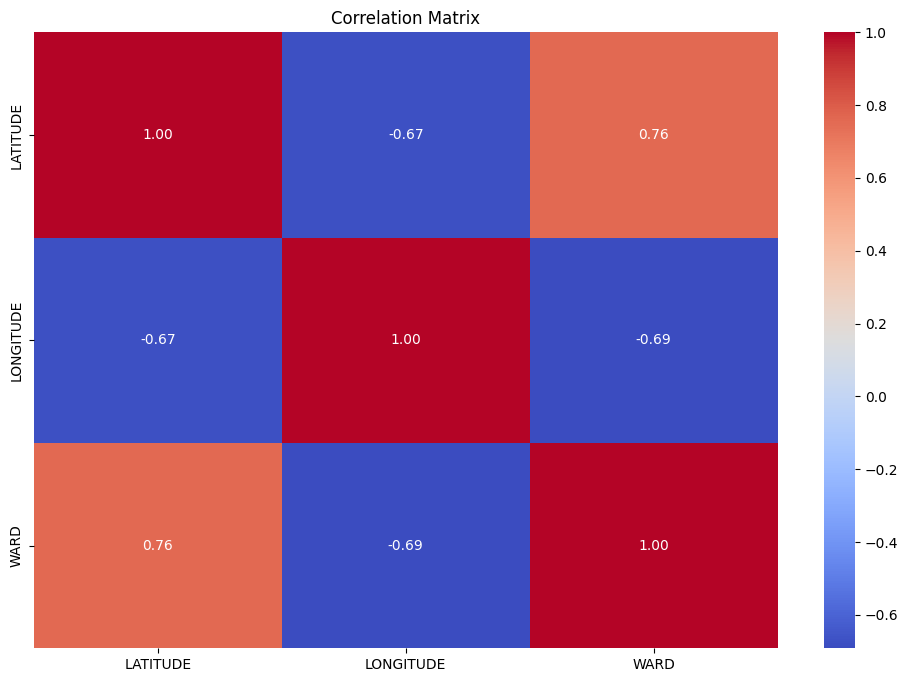

In [16]:
if not numerical_cols.empty:
    correlation_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") 
    plt.title("Correlation Matrix")
    plt.show()

## 2. Clean and Preprocess :

### 2.1. Handling Missing Values :

#### 2.1.1. Visualize Missing Data :

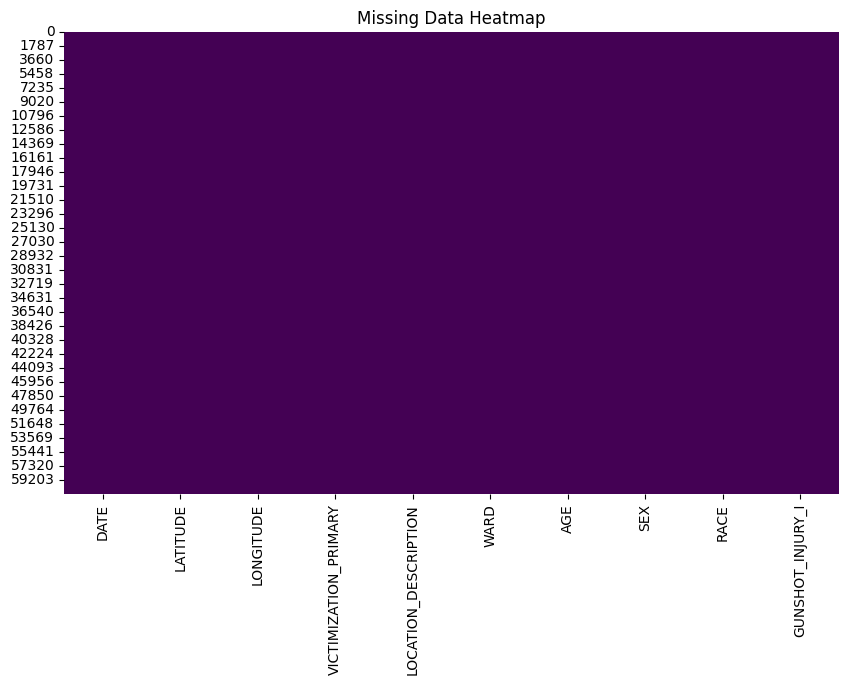

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(Violence_Reduction_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

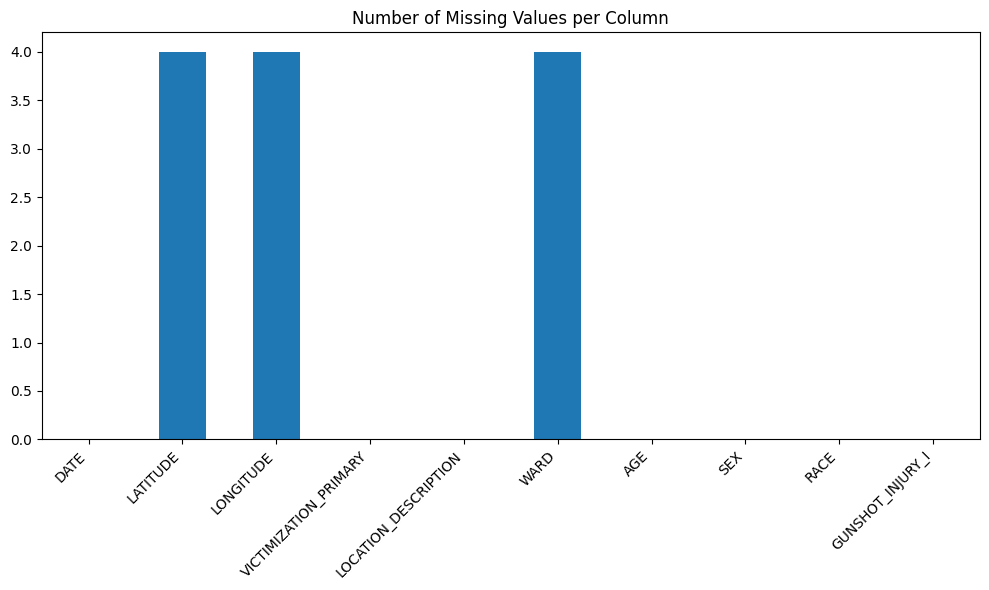

In [18]:
plt.figure(figsize=(10, 6))
Violence_Reduction_df.isnull().sum().plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.1.2. Calculate Missing Percentages :

In [19]:
print(f"\nMissing Percentages: {Violence_Reduction_df.isnull().mean() * 100} ")


Missing Percentages: DATE                     0.000000
LATITUDE                 0.006897
LONGITUDE                0.006897
VICTIMIZATION_PRIMARY    0.000000
LOCATION_DESCRIPTION     0.000000
WARD                     0.006897
AGE                      0.000000
SEX                      0.000000
RACE                     0.000000
GUNSHOT_INJURY_I         0.000000
dtype: float64 


#### 2.1.3. Strategies for Handling Missing Data :

##### 2.1.3.1. Dropping Rows :

In [20]:
Violence_Reduction_df.dropna(subset=['LATITUDE', 'LONGITUDE', 'WARD'], inplace=True)

In [21]:
print(f"\nMissing Percentages After Handling: {Violence_Reduction_df.isnull().mean() * 100}")


Missing Percentages After Handling: DATE                     0.0
LATITUDE                 0.0
LONGITUDE                0.0
VICTIMIZATION_PRIMARY    0.0
LOCATION_DESCRIPTION     0.0
WARD                     0.0
AGE                      0.0
SEX                      0.0
RACE                     0.0
GUNSHOT_INJURY_I         0.0
dtype: float64


In [22]:
Violence_Reduction_df.shape

(57989, 10)

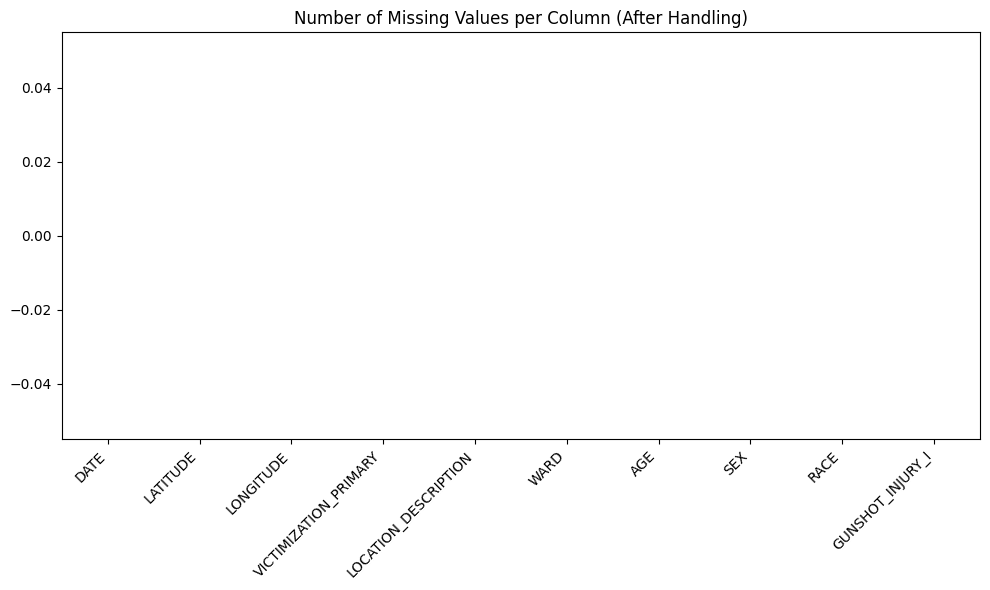

In [23]:
plt.figure(figsize=(10, 6))
Violence_Reduction_df.isnull().sum().plot(kind='bar')
plt.title('Number of Missing Values per Column (After Handling)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.2. Data Type Conversion :

### 2.2.1. Numerical Columns :

#### 2.2.1.1. DATE Column :

In [24]:
Violence_Reduction_df['DATE'] = pd.to_datetime(Violence_Reduction_df['DATE'], errors='coerce')

In [25]:
Violence_Reduction_df['DATE'].dtype

dtype('<M8[ns]')

#### 2.2.1.2. AGE Column ( Convert the 'AGE' ranges to numerical midpoints, 'AGE_MIDPOINT' ) :

In [26]:
def age_range_to_midpoint(age_range):
    if isinstance(age_range, str):  
        try:
            if '+' in age_range: 
                low = int(age_range.replace('+', ''))
                return low 
            else:
                low, high = map(int, age_range.split('-'))
                return (low + high) / 2
        except:  
            return np.nan  
    return age_range 

Violence_Reduction_df['AGE_MIDPOINT'] = Violence_Reduction_df['AGE'].apply(age_range_to_midpoint)

Violence_Reduction_df['AGE_MIDPOINT'].fillna(Violence_Reduction_df['AGE_MIDPOINT'].median(), inplace=True)

Violence_Reduction_df['AGE_MIDPOINT']=Violence_Reduction_df['AGE_MIDPOINT'].astype(int)

Violence_Reduction_df.drop('AGE', axis=1, inplace=True) 

In [27]:
Violence_Reduction_df['AGE_MIDPOINT'].dtype

dtype('int32')

### 2.2.2. Other Columns ( Converting a 'YES/NO' column to integer ) :

#### 2.2.2.1. GUNSHOT_INJURY_I Column :

In [28]:
Violence_Reduction_df['GUNSHOT_INJURY_I'] = Violence_Reduction_df['GUNSHOT_INJURY_I'].replace({'YES': 1, 'NO': 0}).astype('int')

In [29]:
Violence_Reduction_df.rename(columns={'GUNSHOT_INJURY_I': 'GUNSHOT_INJURY'}, inplace=True)

In [30]:
Violence_Reduction_df['GUNSHOT_INJURY'].dtype

dtype('int32')

### 2.2.3. Verify Conversions :

In [31]:
Violence_Reduction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57989 entries, 0 to 61078
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   57989 non-null  datetime64[ns]
 1   LATITUDE               57989 non-null  float64       
 2   LONGITUDE              57989 non-null  float64       
 3   VICTIMIZATION_PRIMARY  57989 non-null  object        
 4   LOCATION_DESCRIPTION   57989 non-null  object        
 5   WARD                   57989 non-null  float64       
 6   SEX                    57989 non-null  object        
 7   RACE                   57989 non-null  object        
 8   GUNSHOT_INJURY         57989 non-null  int32         
 9   AGE_MIDPOINT           57989 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), object(4)
memory usage: 4.4+ MB


### 2.3. Cleaning Categorical Data :

### 2.3.1. One-hot encode for Columns VICTIMIZATION_PRIMARY, WARD, SEX and RACE :

In [32]:
Violence_Reduction_df['VICTIMIZATION_PRIMARY'].unique()

array(['HOMICIDE', 'BATTERY', 'ROBBERY', 'NON-FATAL',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION'], dtype=object)

In [33]:
Violence_Reduction_df['WARD'].unique()

array([48.,  6.,  7.,  9., 16., 10., 30., 24., 15.,  8.,  3., 23., 22.,
       29., 12., 36., 21.,  5., 27., 17., 26., 34., 33.,  4., 41., 28.,
       42., 37., 20., 44., 14., 32., 35., 25., 11., 19., 18., 50., 31.,
        1., 13., 46., 49.,  2., 45., 47., 39., 40., 38., 43.])

In [34]:
Violence_Reduction_df['SEX'].unique()

array(['M', 'F', 'UNKNOWN'], dtype=object)

In [35]:
Violence_Reduction_df['RACE'].unique()

array(['BLK', 'API', 'WWH', 'WHI', 'UNKNOWN', 'WBH', 'I'], dtype=object)

In [36]:
columns_to_encode = ['VICTIMIZATION_PRIMARY', 'WARD', 'SEX', 'RACE']

In [37]:
Violence_Reduction_df = pd.get_dummies(Violence_Reduction_df, columns=columns_to_encode, prefix=columns_to_encode,dtype=int,drop_first=True) 

In [38]:
Violence_Reduction_df.head()

DATE   LATITUDE  LONGITUDE LOCATION_DESCRIPTION  \
0 2022-03-08 15:27:00  41.990570 -87.657000            APARTMENT   
1 2023-02-11 02:30:00  41.739900 -87.622860                ALLEY   
2 2020-11-21 22:15:00  41.750567 -87.547249               STREET   
3 2024-06-23 08:11:00  41.670653 -87.641779               STREET   
5 2024-07-04 01:01:00  41.780047 -87.662229                 YARD   

   GUNSHOT_INJURY  AGE_MIDPOINT  \
0               0            64   
1               1            24   
2               1            34   
3               1            24   
5               1            34   

   VICTIMIZATION_PRIMARY_CRIMINAL SEXUAL ASSAULT  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
5                                              0   

   VICTIMIZATION_PRIMARY_HOMICIDE  VICTIMIZATION_PRIMARY_NON-FATAL  \
0                               1                                0   
1                               1                                0   
2                               1                                0   
3                               1                                0   
5                               1                                0   

   VICTIMIZATION_PRIMARY_PUBLIC PEACE VIOLATION  ...  WARD_49.0  WARD_50.0  \
0                                             0  ...          0          0   
1                                             0  ...          0          0   
2                                             0  ...          0          0   
3                                             0  ...          0          0   
5                                             0  ...          0          0   

   SEX_M  SEX_UNKNOWN  RACE_BLK  RACE_I  RACE_UNKNOWN  RACE_WBH  RACE_WHI  \
0      1            0         1       0             0         0         0   
1      1            0         0       0             0         0         0   
2      1            0         1       0             0         0         0   
3      1            0         1       0             0         0         0   
5      1            0         1       0             0         0         0   

   RACE_WWH  
0         0  
1         0  
2         0  
3         0  
5         0  

[5 rows x 68 columns]

### 2.4. Handling Outliers :

#### 2.4.1. Visualize Outliers :

##### 2.4.1.1. Box Plots :

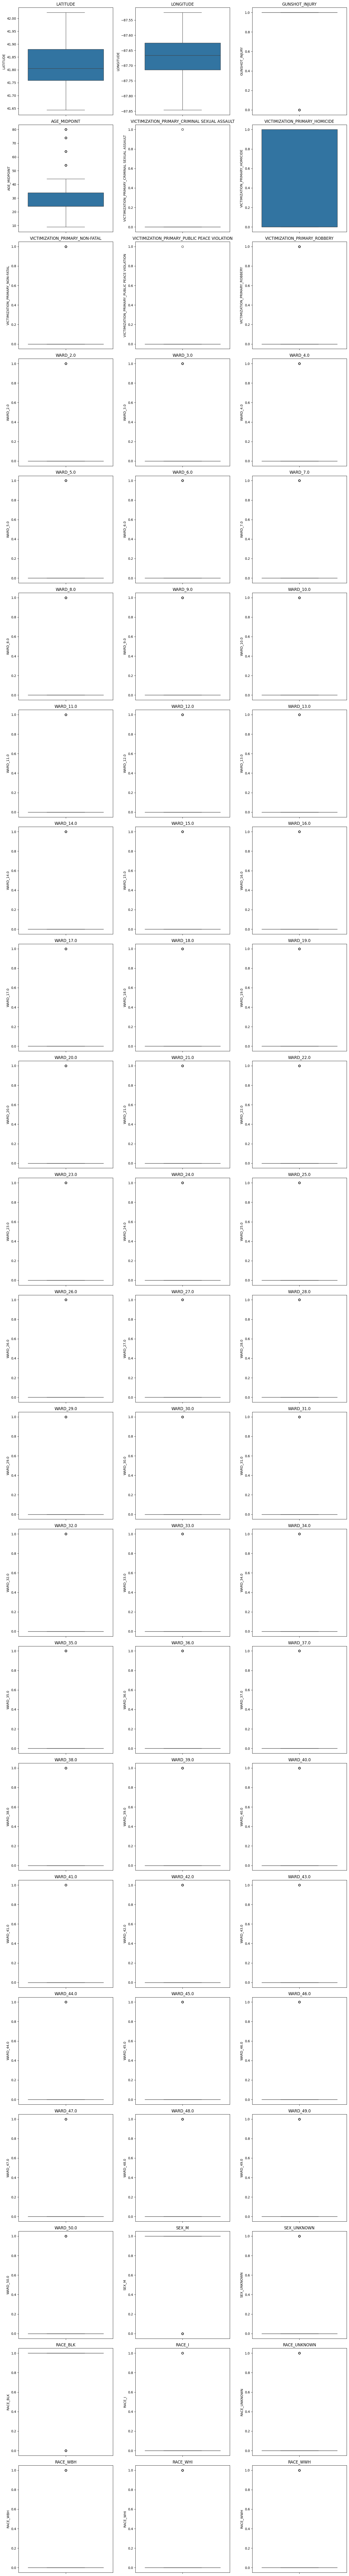

In [39]:
numerical_cols = Violence_Reduction_df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=Violence_Reduction_df[col], ax=axes[i]).set(title=col) 
    else:
        break
plt.tight_layout()
plt.show()

##### 2.4.1.2. Histograms :

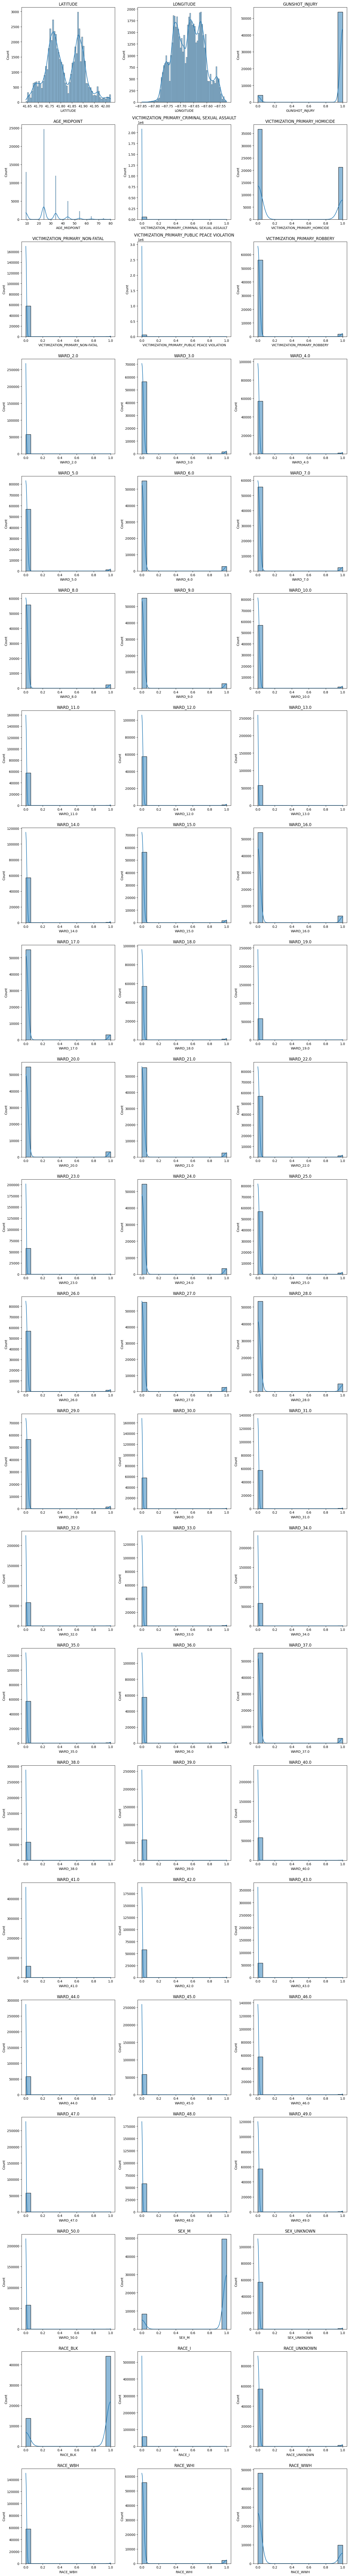

In [40]:
n_cols = 3  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.histplot(Violence_Reduction_df[col], kde=True, ax=axes[i]).set(title=col) 
    else:
        break
plt.tight_layout()
plt.show()

#### 2.4.2. Strategies for Handling Outliers :

##### 2.4.2.1. IQR Method (Interquartile Range) :

In [41]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [42]:
Violence_Reduction_df = remove_outliers_iqr(Violence_Reduction_df, 'AGE_MIDPOINT')

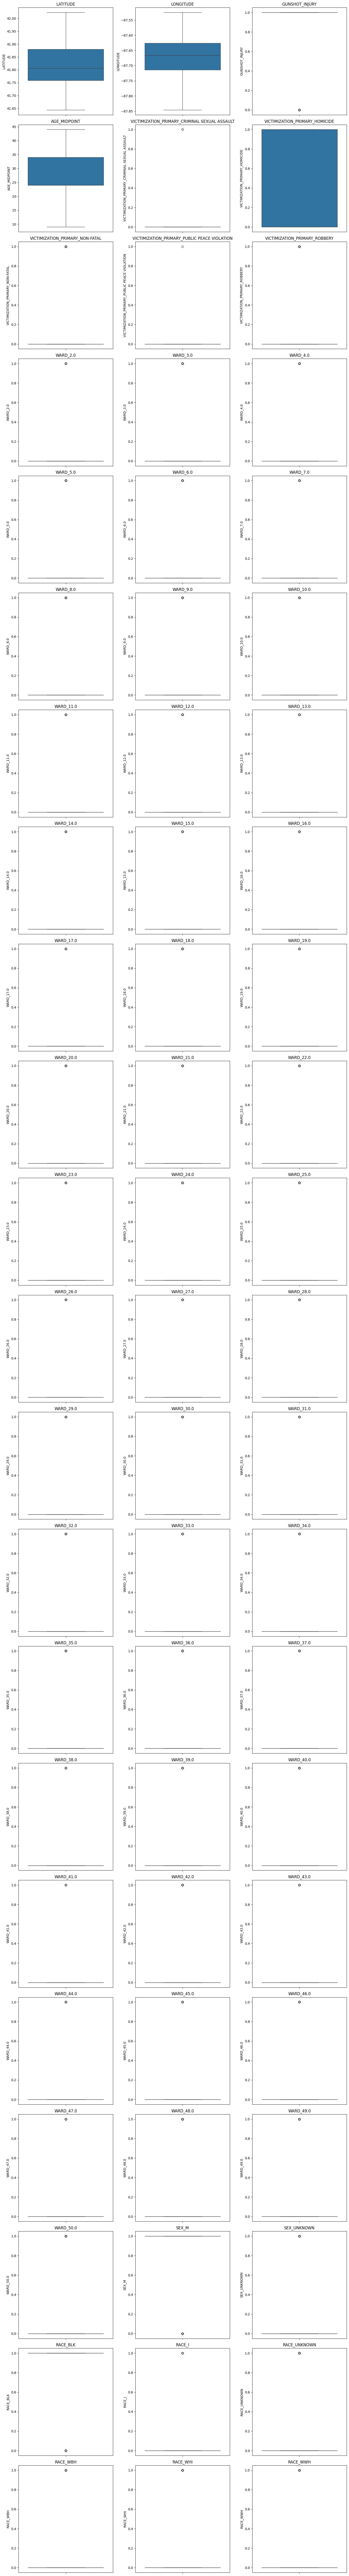

In [43]:
numerical_cols = Violence_Reduction_df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=Violence_Reduction_df[col], ax=axes[i]).set(title=col) 
    else:
        break
plt.tight_layout()
plt.show()

### 2.5 Perform the Feature Engineering :

#### 2.5.1. Create the new columns (YEAR, MONTH, DAY_OF_WEEK, DAY_OF_MONTH, WEEK_OF_YEAR, TIME_OF_DAY, RISK_LEVEL) :

##### 2.6.1.1. YEAR, MONTH, DAY_OF_WEEK, DAY_OF_MONTH, WEEK_OF_YEAR :

In [44]:
if 'DATE' in Violence_Reduction_df.columns:  
    Violence_Reduction_df['YEAR'] = Violence_Reduction_df['DATE'].dt.year
    Violence_Reduction_df['MONTH'] = Violence_Reduction_df['DATE'].dt.month
    Violence_Reduction_df['DAY_OF_WEEK'] = Violence_Reduction_df['DATE'].dt.dayofweek
    Violence_Reduction_df['DAY_OF_MONTH'] = Violence_Reduction_df['DATE'].dt.day
    Violence_Reduction_df['WEEK_OF_YEAR'] = Violence_Reduction_df['DATE'].dt.isocalendar().week 

##### 2.5.1.2. TIME_OF_DAY :

In [45]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
Violence_Reduction_df['TIME_OF_DAY'] = Violence_Reduction_df['DATE'].dt.hour.apply(categorize_time)


##### 2.5.1.2.1. One-hot encode TIME_OF_DAY :

In [46]:
Violence_Reduction_df = pd.get_dummies(Violence_Reduction_df, columns=['TIME_OF_DAY'], prefix='TIME_OF_DAY') 

##### 2.5.1.3. RISK_LEVEL (Target Variable - Based on the number of incidents per ward per month) :

In [47]:
ward_columns = Violence_Reduction_df.filter(like='WARD_').columns

##### 2.5.1.3.1. Group by the one-hot encoded WARD columns, MONTH, and YEAR to CREATE INCIDENT_COUNT :

In [48]:
incidents_per_ward_month = Violence_Reduction_df.groupby(list(ward_columns) + ['MONTH', 'YEAR']).size().reset_index(name='INCIDENT_COUNT')

##### 2.5.1.3.2. Define thresholds :

In [49]:
high_risk_threshold = incidents_per_ward_month['INCIDENT_COUNT'].quantile(0.75)  # 75th percentile
medium_risk_threshold = incidents_per_ward_month['INCIDENT_COUNT'].quantile(0.35)  # 35th percentile

##### 2.5.1.3.3. Create the RISK_LEVEL column :

In [50]:
def assign_risk_level(count):
    if count >= high_risk_threshold:
        return 'High'
    elif count >= medium_risk_threshold:
        return 'Medium'
    else:
        return 'Low'

incidents_per_ward_month['RISK_LEVEL'] = incidents_per_ward_month['INCIDENT_COUNT'].apply(assign_risk_level)

##### 2.5.1.3.4. Merge the risk level back into the main DataFrame (using the one-hot encoded WARD columns) :

In [51]:
Violence_Reduction_df = pd.merge(Violence_Reduction_df, incidents_per_ward_month[list(ward_columns) + ['MONTH', 'YEAR', 'RISK_LEVEL', 'INCIDENT_COUNT']], 
              on=list(ward_columns) + ['MONTH', 'YEAR'], how='left')

In [52]:
Violence_Reduction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54484 entries, 0 to 54483
Data columns (total 79 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   DATE                                           54484 non-null  datetime64[ns]
 1   LATITUDE                                       54484 non-null  float64       
 2   LONGITUDE                                      54484 non-null  float64       
 3   LOCATION_DESCRIPTION                           54484 non-null  object        
 4   GUNSHOT_INJURY                                 54484 non-null  int32         
 5   AGE_MIDPOINT                                   54484 non-null  int32         
 6   VICTIMIZATION_PRIMARY_CRIMINAL SEXUAL ASSAULT  54484 non-null  int32         
 7   VICTIMIZATION_PRIMARY_HOMICIDE                 54484 non-null  int32         
 8   VICTIMIZATION_PRIMARY_NON-FATAL                54484 non

##### 2.5.1.3.5. One-hot encode RISK_LEVEL :

In [53]:
Violence_Reduction_df = pd.get_dummies(Violence_Reduction_df, columns=['RISK_LEVEL'], prefix='RISK_LEVEL')

##### 2.5.1.3.6. Convert Original RISK_LEVEL to Numeric :

In [54]:
Violence_Reduction_df['RISK_LEVEL_Numeric'] = Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1).astype('category').cat.codes

In [55]:
Violence_Reduction_df['RISK_LEVEL_Numeric'] = Violence_Reduction_df['RISK_LEVEL_Numeric'].astype('int')

In [56]:
print(Violence_Reduction_df)

                     DATE   LATITUDE  LONGITUDE LOCATION_DESCRIPTION  \
0     2023-02-11 02:30:00  41.739900 -87.622860                ALLEY   
1     2020-11-21 22:15:00  41.750567 -87.547249               STREET   
2     2024-06-23 08:11:00  41.670653 -87.641779               STREET   
3     2024-07-04 01:01:00  41.780047 -87.662229                 YARD   
4     2024-04-28 22:54:00  41.733280 -87.545900               STREET   
...                   ...        ...        ...                  ...   
54479 2025-01-01 03:00:00  41.878187 -87.732239            APARTMENT   
54480 2025-01-28 09:11:00  41.916885 -87.795672               STREET   
54481 2024-01-12 21:45:00  41.766742 -87.670865               STREET   
54482 2025-01-28 04:50:00  41.753998 -87.568065                ALLEY   
54483 2025-01-27 05:16:00  41.793892 -87.669765               STREET   

       GUNSHOT_INJURY  AGE_MIDPOINT  \
0                   1            24   
1                   1            34   
2                 

### 2.6. Visualization :

#### 2.6.1. Distribution of Target Variable :

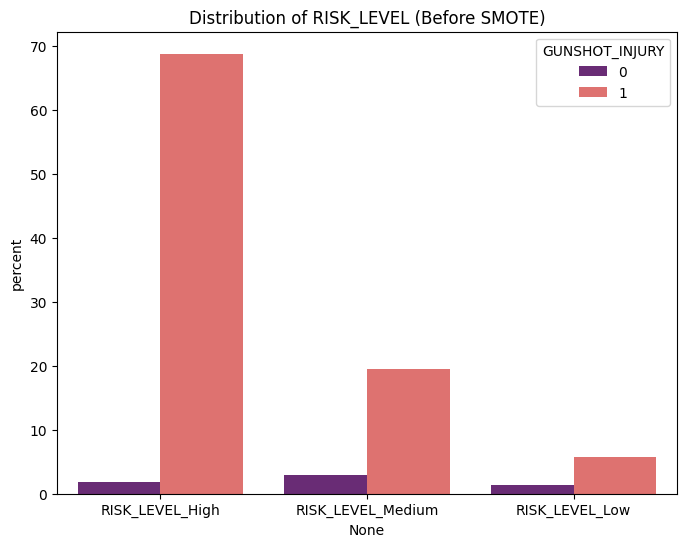

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x=Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1),palette='magma',hue=Violence_Reduction_df['GUNSHOT_INJURY'], stat="percent") 
plt.title('Distribution of RISK_LEVEL (Before SMOTE)')
plt.show()

#### 2.6.2. Feature Distributions :

##### 2.6.2.1. Numerical features :

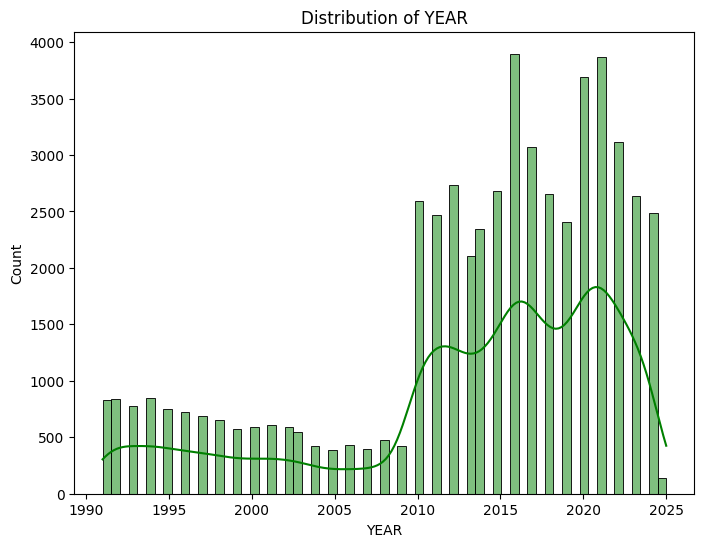

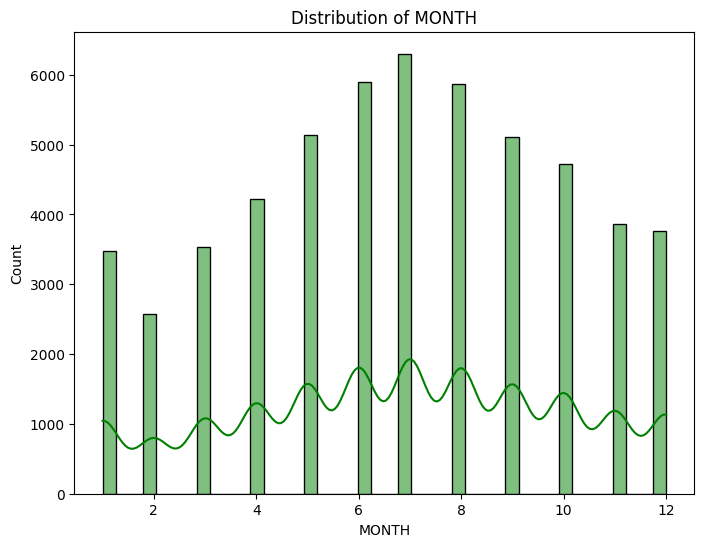

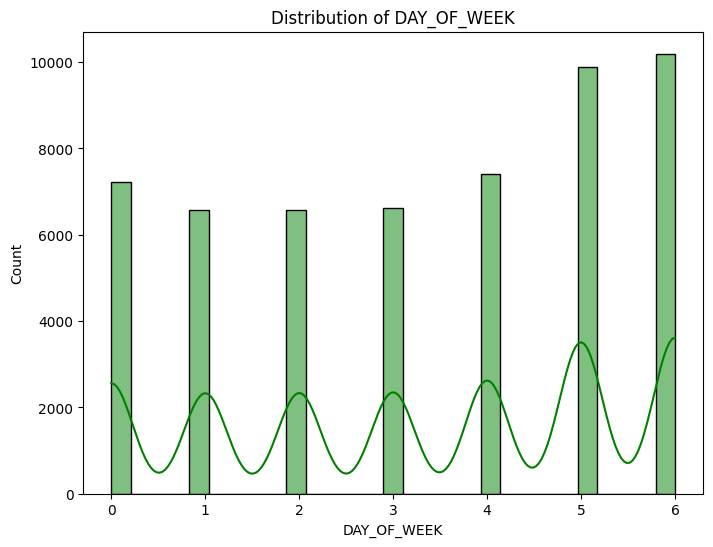

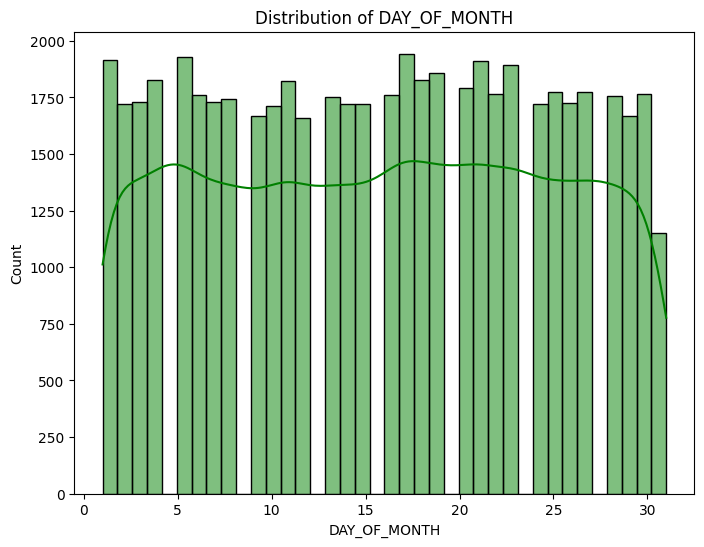

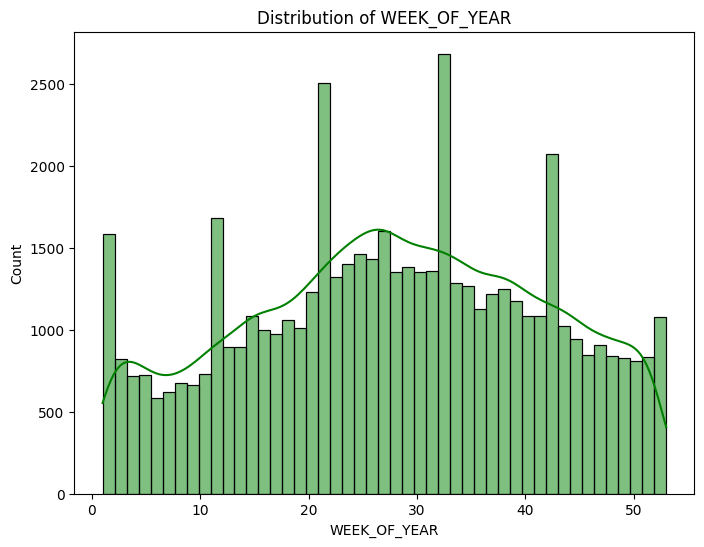

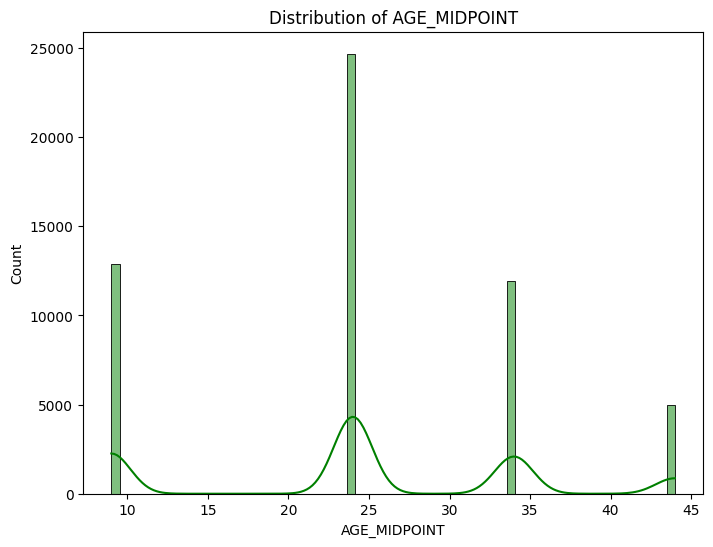

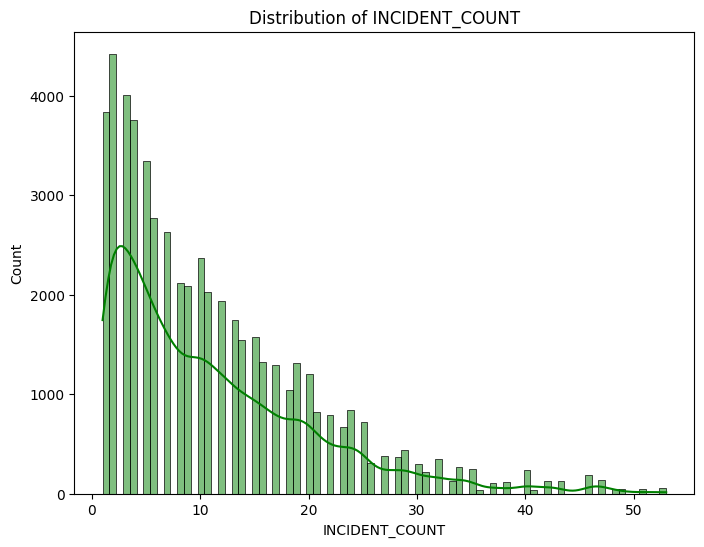

In [58]:
numerical_features = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'WEEK_OF_YEAR', 'AGE_MIDPOINT', 'INCIDENT_COUNT']
for feature in numerical_features:
    if feature in Violence_Reduction_df.columns: 
        plt.figure(figsize=(8, 6))
        sns.histplot(Violence_Reduction_df[feature],color='g', kde=True)  
        plt.title(f'Distribution of {feature}')
        plt.show()

##### 2.6.2.2. Categorical features (one-hot encoded WARDs) :

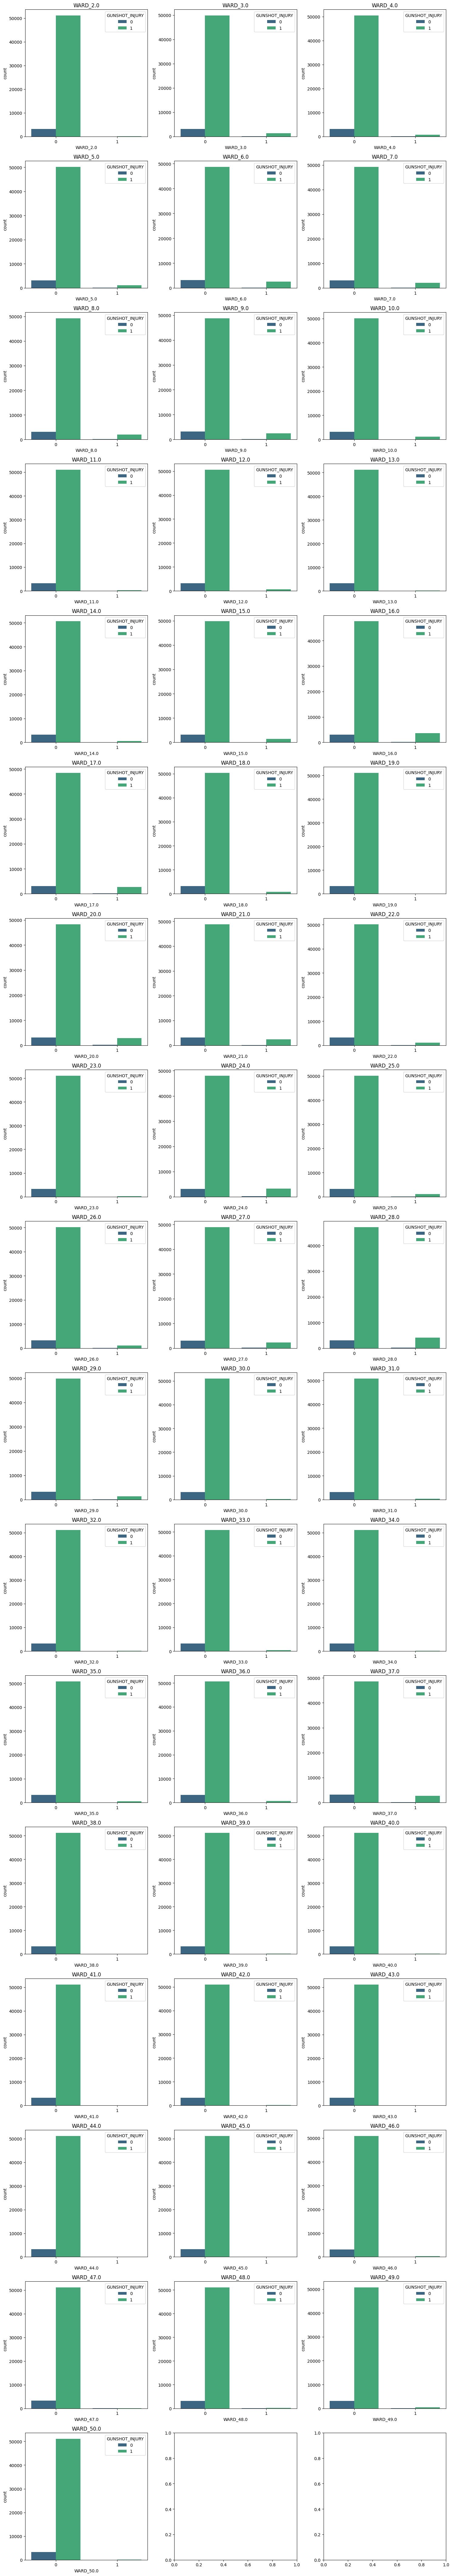

In [59]:
ward_columns = [col for col in Violence_Reduction_df.columns if col.startswith('WARD_')]
n_cols = 3  
n_rows = (len(ward_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(ward_columns):
    if i < len(axes):
        sns.color_palette("husl", 9)
        sns.countplot(x=Violence_Reduction_df[col],hue =Violence_Reduction_df['GUNSHOT_INJURY'], palette='viridis', ax=axes[i]).set(title=col)
    else:
        break
plt.tight_layout()
plt.show()


#### 2.6.2.3. Time of Day (if one-hot encoded) :

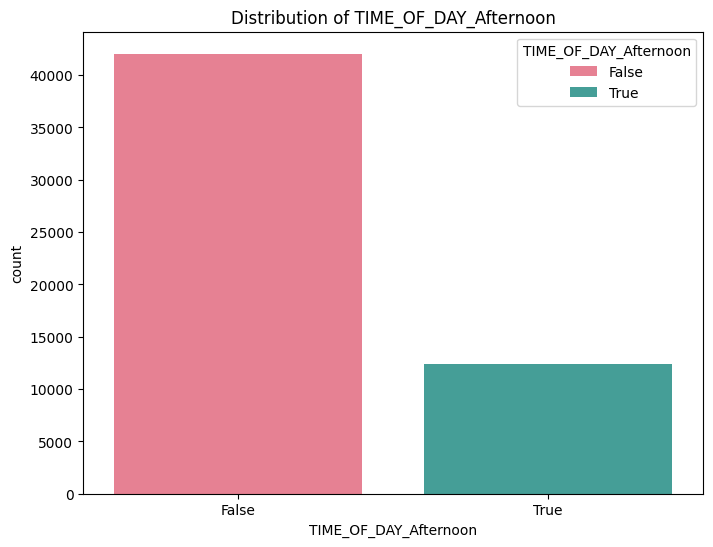

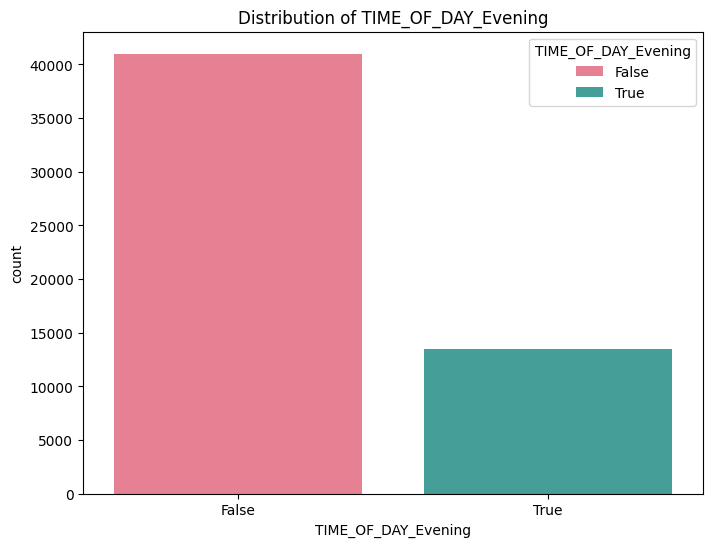

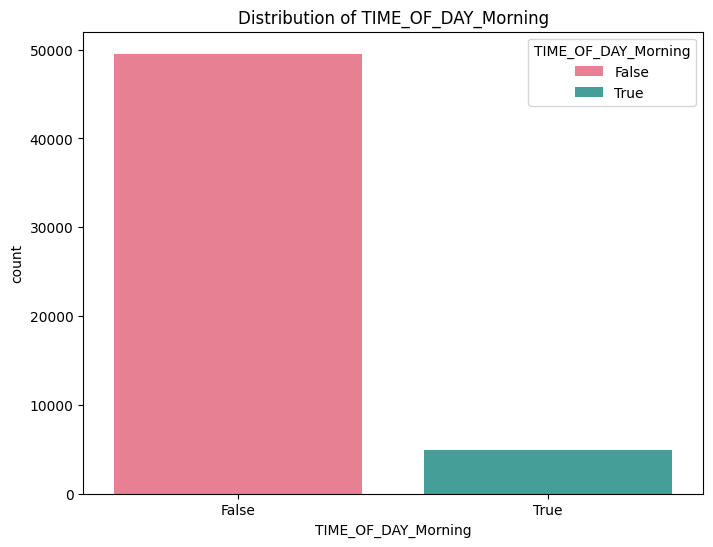

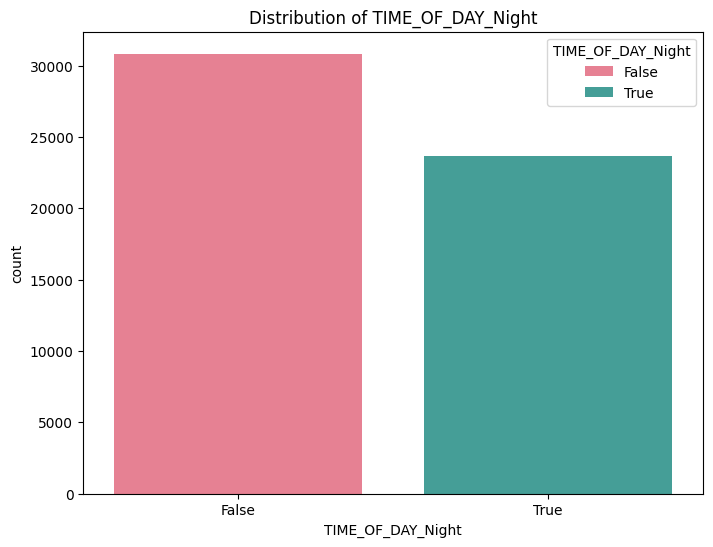

In [60]:
time_of_day_columns = [col for col in Violence_Reduction_df.columns if col.startswith('TIME_OF_DAY_')]
for tod in time_of_day_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=Violence_Reduction_df[tod], palette='husl',hue=Violence_Reduction_df[tod])
    plt.title(f'Distribution of {tod}')
    plt.show()

#### 2.6.3. Relationship between Features and Target :

##### 2.6.3.1. Box plots for numerical features vs. RISK_LEVEL :

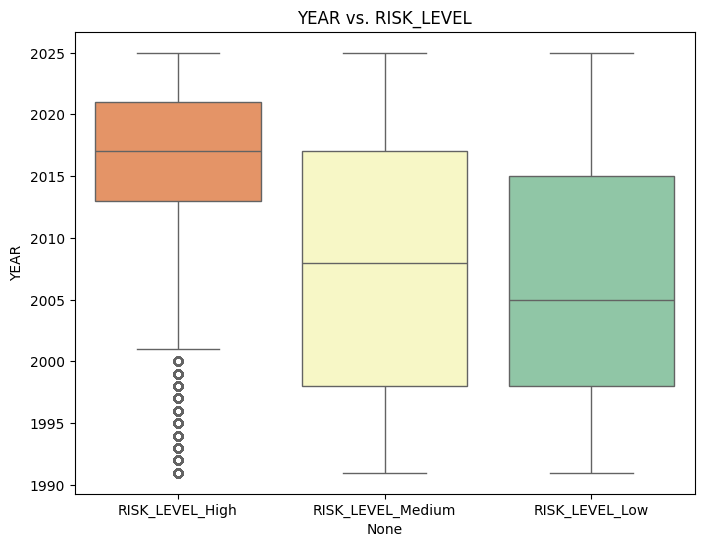

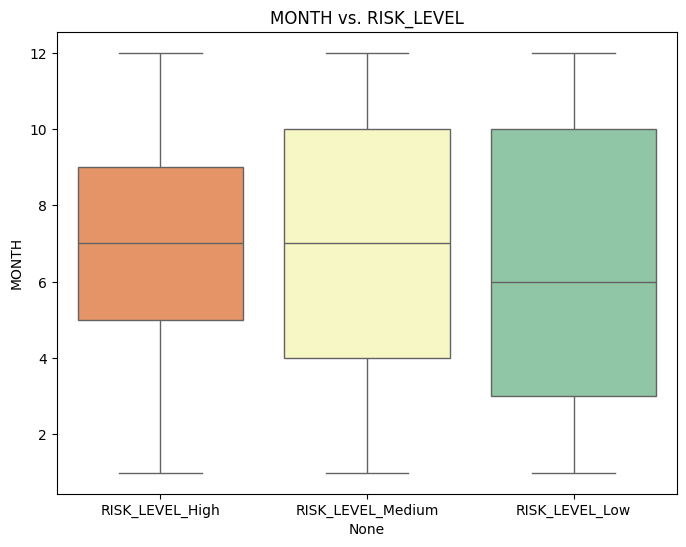

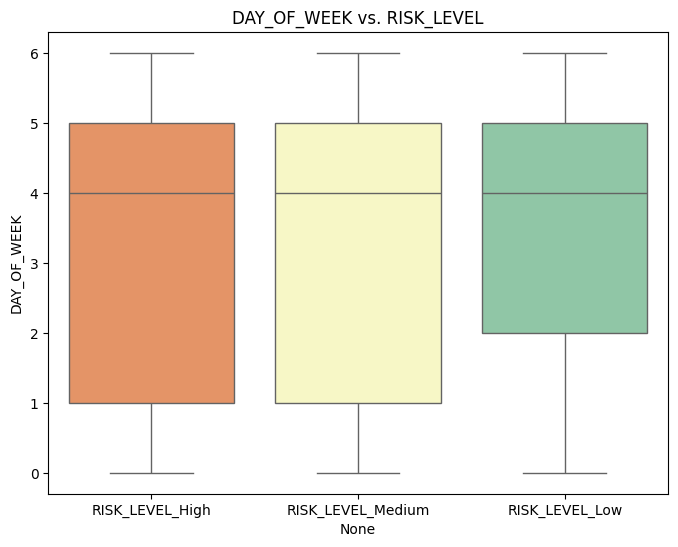

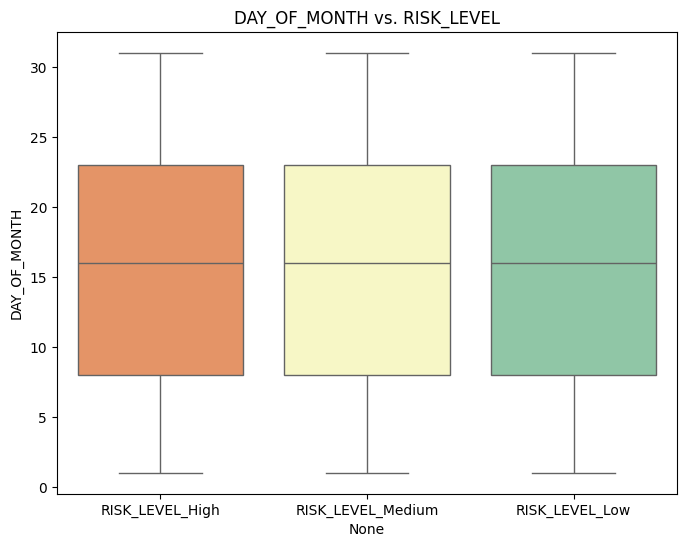

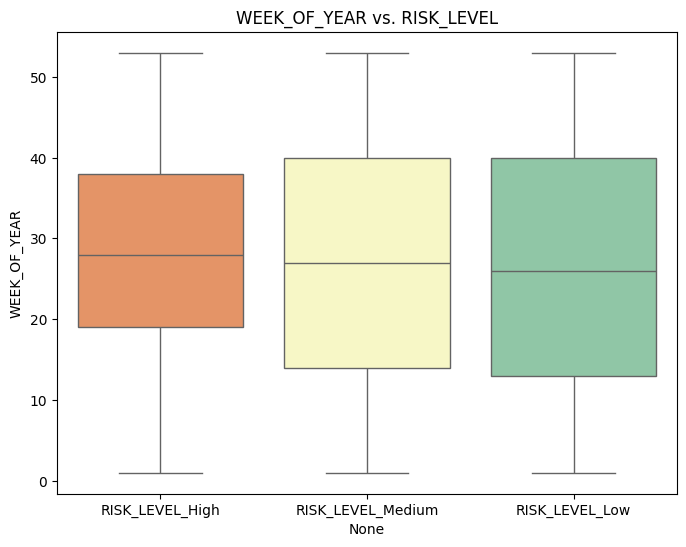

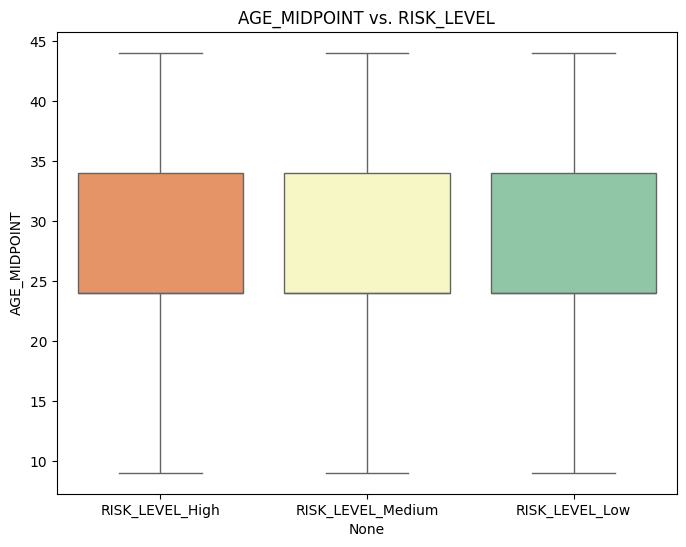

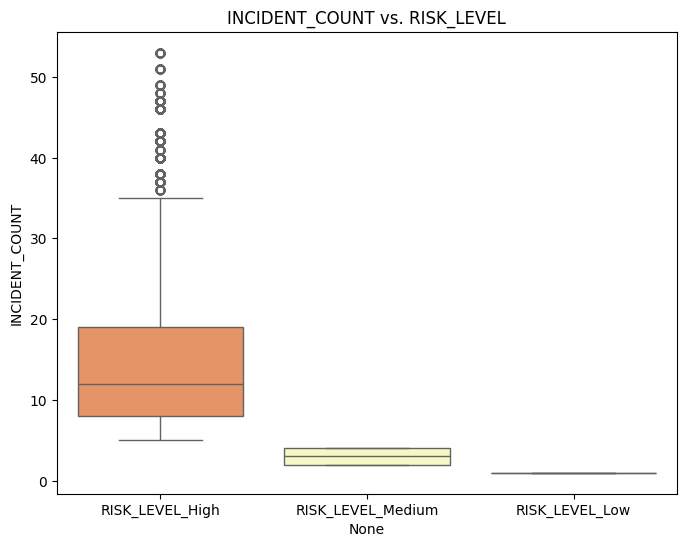

In [61]:
for feature in numerical_features:
    if feature in Violence_Reduction_df.columns: # Check if the column exists to avoid errors.
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1), y=Violence_Reduction_df[feature], palette='Spectral') 
        plt.title(f'{feature} vs. RISK_LEVEL')
        plt.show()

#### 2.6.4. Scatter Plots of Month vs. Incident Count :

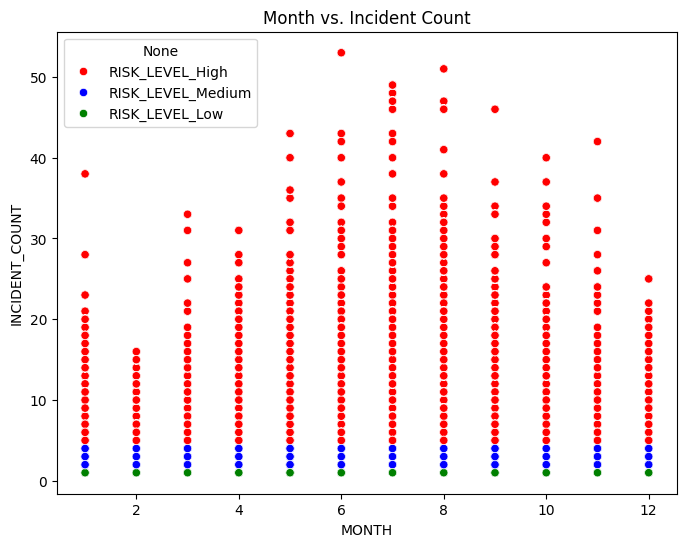

In [62]:
colors = ['red','blue', 'green']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MONTH', y='INCIDENT_COUNT', hue=Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1), data=Violence_Reduction_df, palette=colors)
plt.title('Month vs. Incident Count')
plt.show()

#### 2.6.5.  Pair Plot :

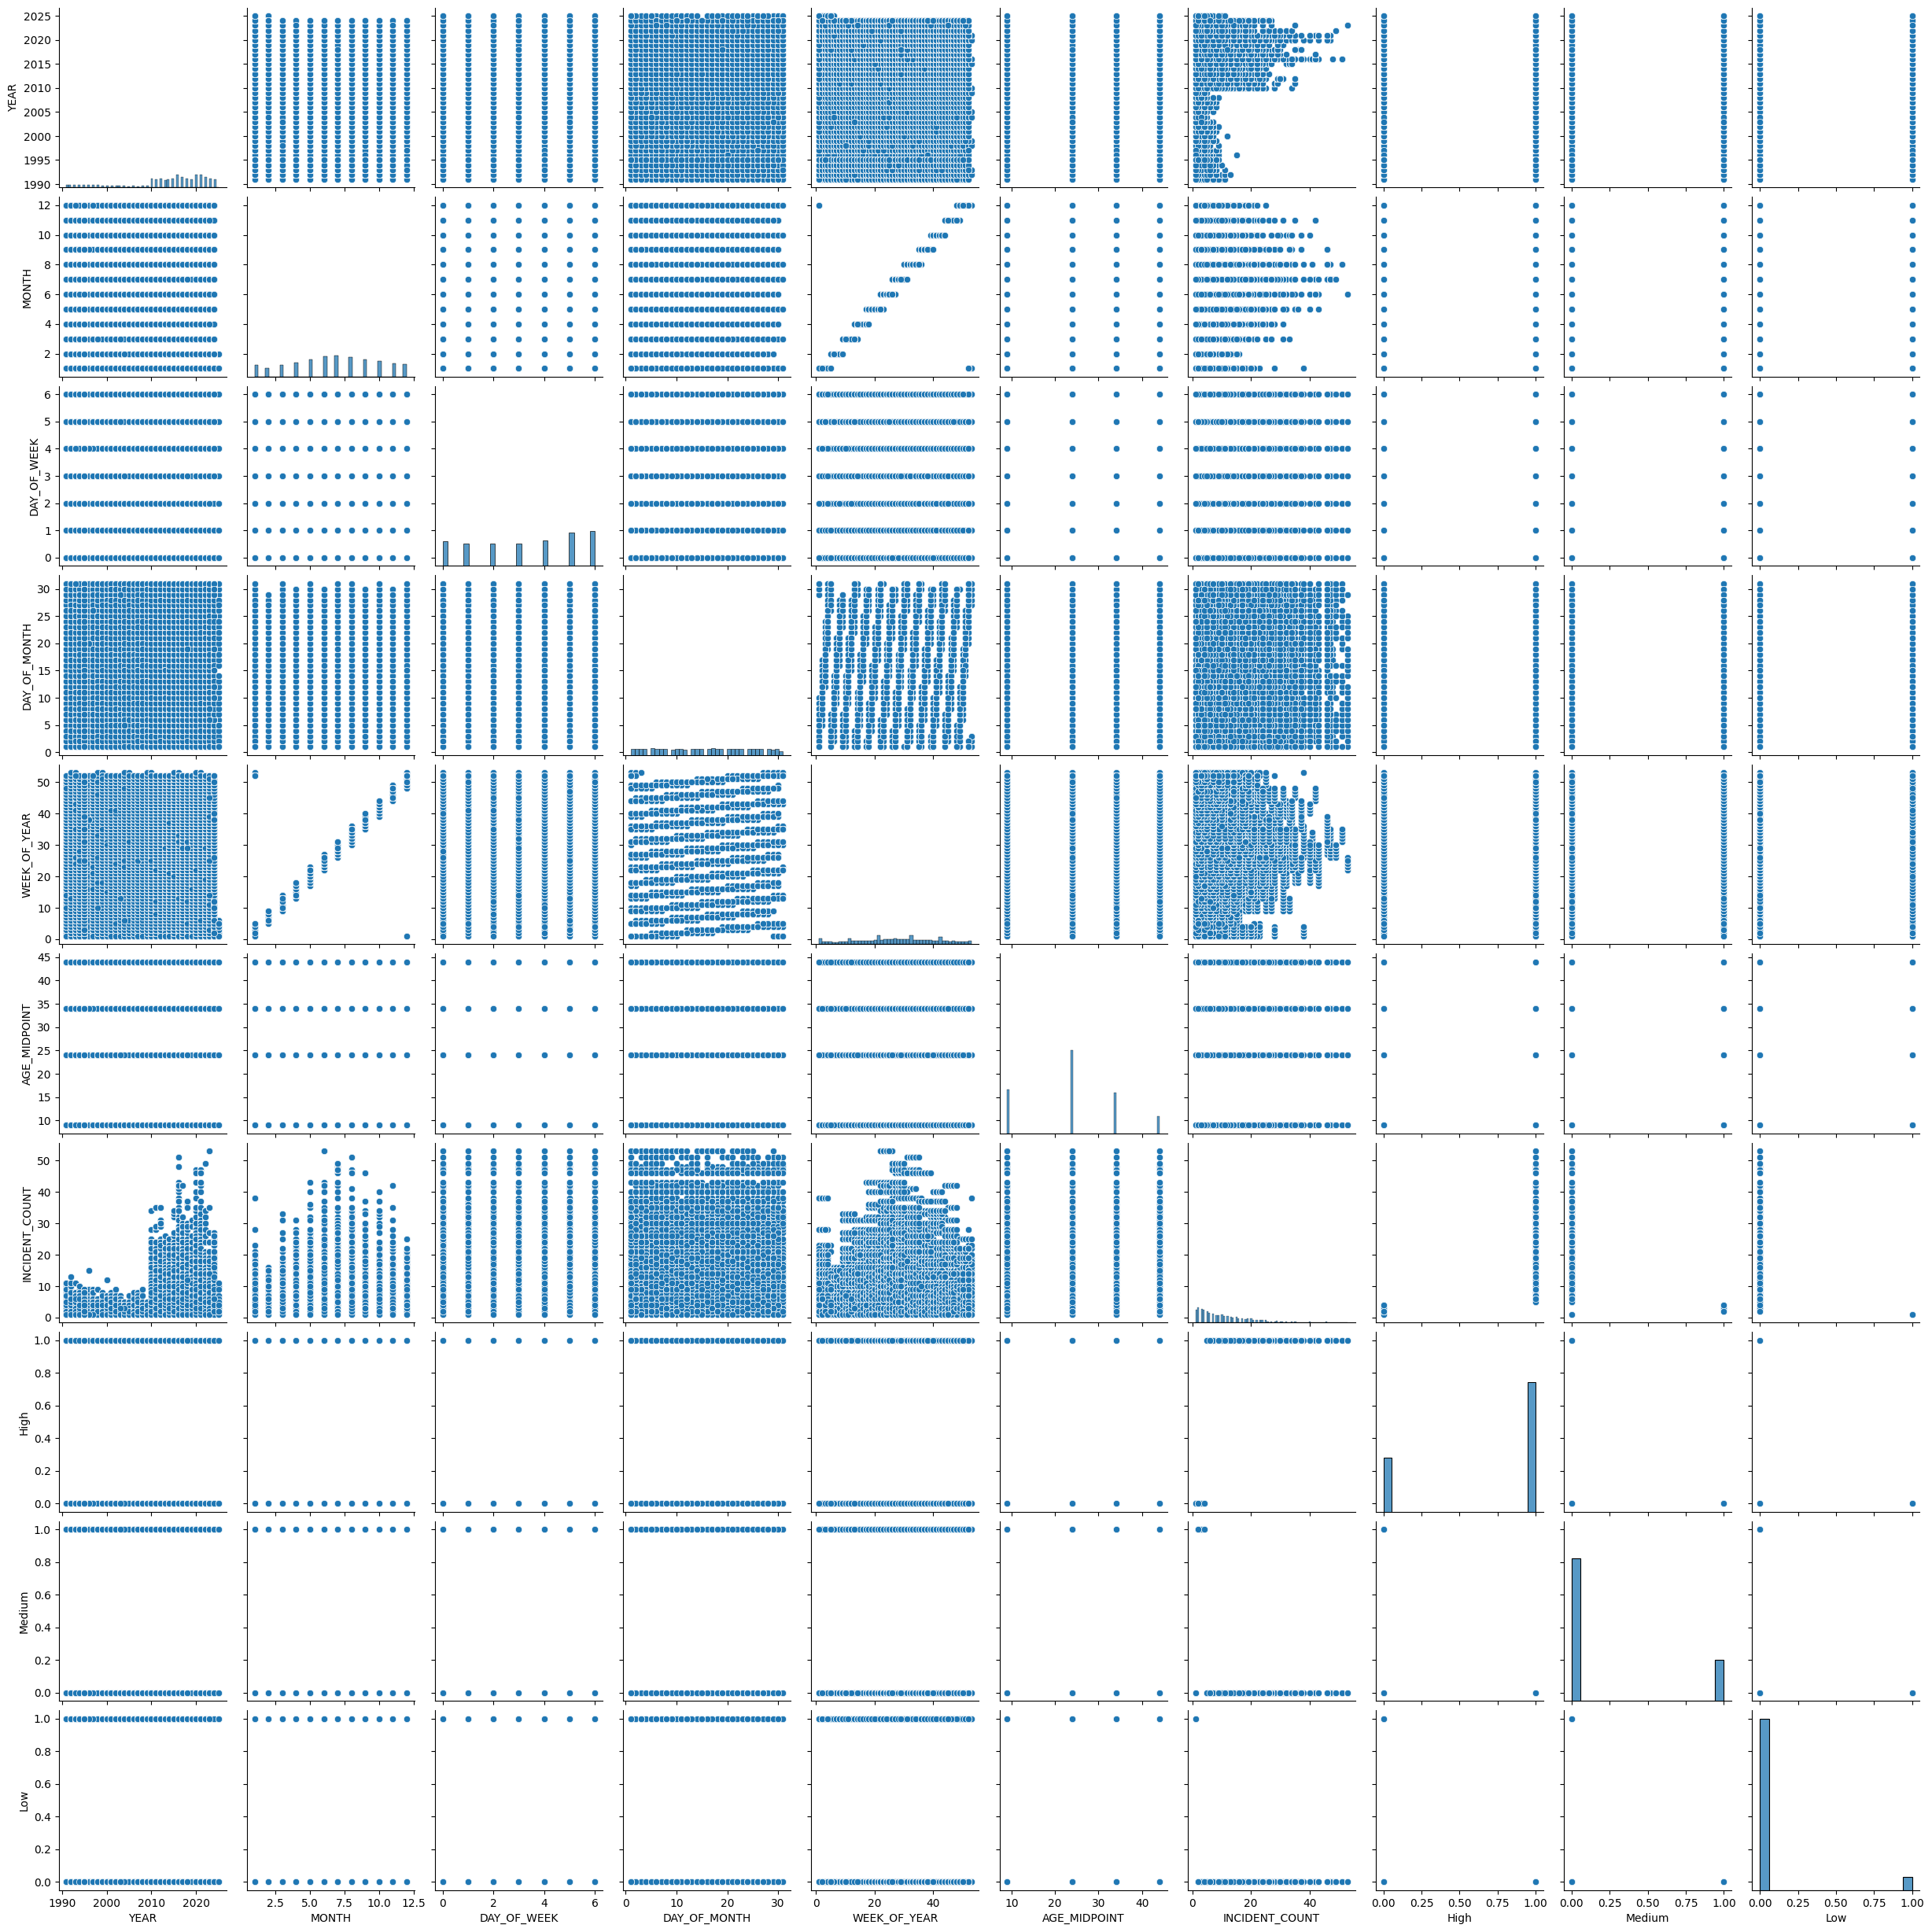

In [63]:
numerical_features = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'WEEK_OF_YEAR', 'AGE_MIDPOINT', 'INCIDENT_COUNT']
sns.pairplot(Violence_Reduction_df[numerical_features + ['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].rename(columns=lambda x: x.replace('RISK_LEVEL_', '')),palette='magma') 
plt.show()

#### 2.6.6. Pie Chart (Distribution of Risk Levels) :

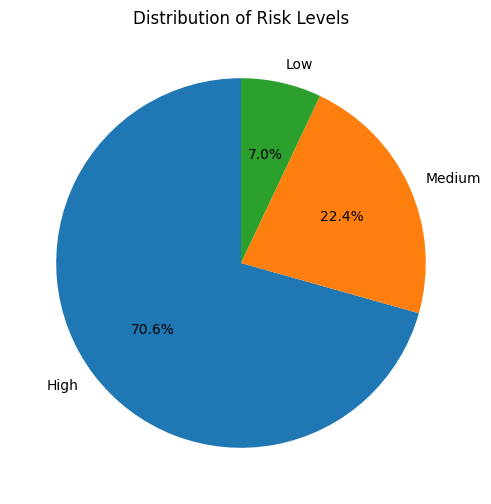

In [64]:
risk_level_counts = Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].sum().values 

labels = ['High', 'Medium', 'Low']  
plt.figure(figsize=(8, 6))
plt.pie(risk_level_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk Levels')
plt.show()

#### 2.6.7. Joint Plots :

##### 2.6.7.1. Joint Plot of Incident Count vs. Age :

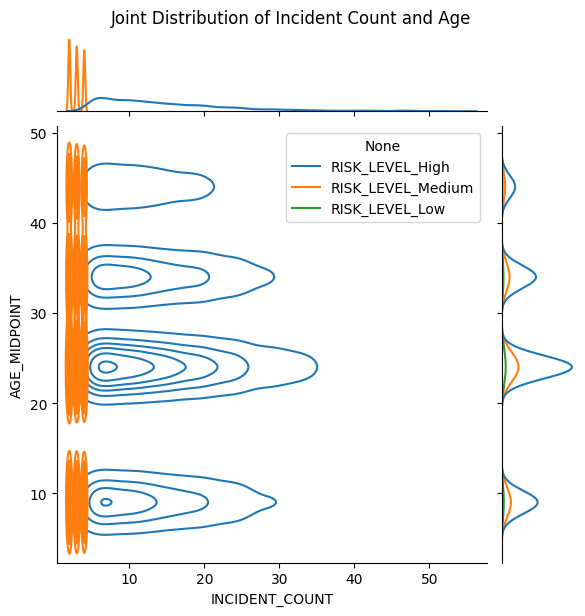

In [65]:
sns.jointplot(x='INCIDENT_COUNT', y='AGE_MIDPOINT', data=Violence_Reduction_df, kind='kde', hue=Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1)) # KDE plot with risk level as hue
plt.suptitle('Joint Distribution of Incident Count and Age', y=1.02)
plt.show();

##### 2.6.7.2. Joint Plot of Month and Incident Count :

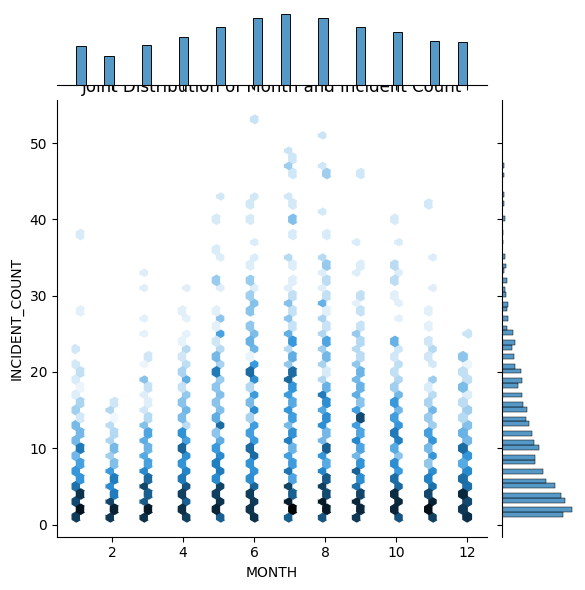

In [66]:
sns.jointplot(x='MONTH', y='INCIDENT_COUNT', data=Violence_Reduction_df, kind='hex',palette="viridis")
plt.title('Joint Distribution of Month and Incident Count')
plt.show()

#### 2.6.8. Violin Plots :

#### 2.6.8.1. Violin Plot for Age Midpoint vs. Risk Level :

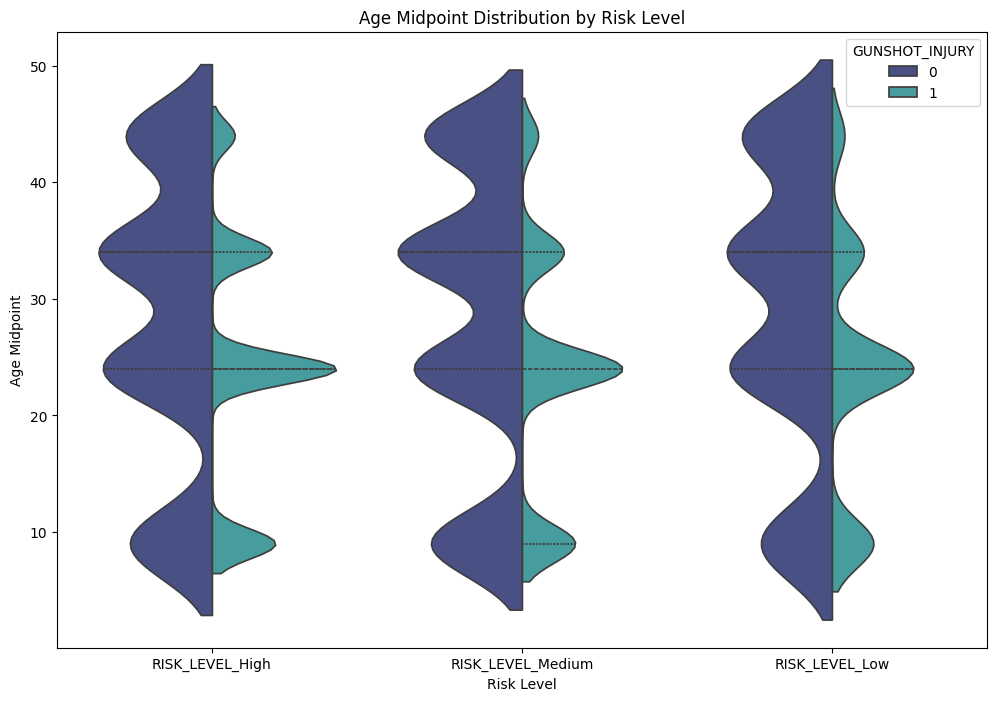

In [67]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=Violence_Reduction_df[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1), y=Violence_Reduction_df['AGE_MIDPOINT'], split=True,hue =Violence_Reduction_df['GUNSHOT_INJURY'], palette='mako', inner="quart")
plt.title('Age Midpoint Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Age Midpoint')
plt.show()

#### 2.6.8.2. Violin Plot for RACE vs. Numerical Features :

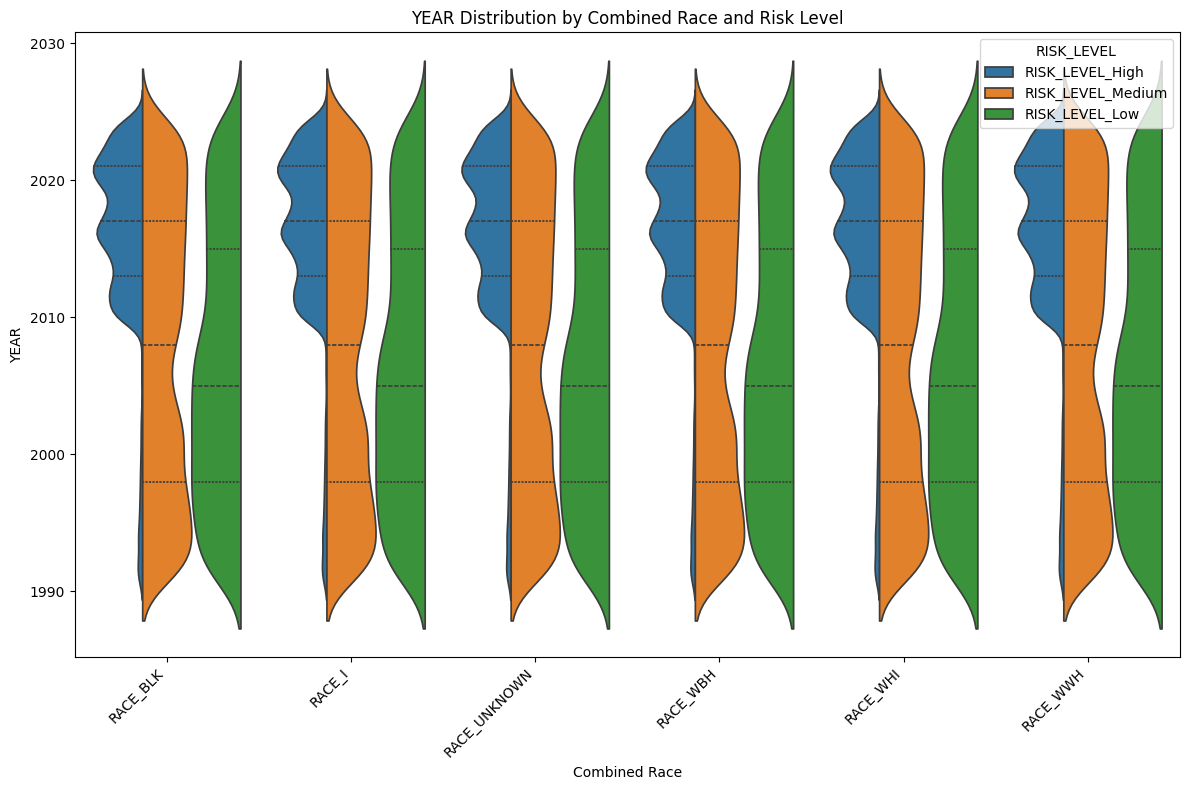

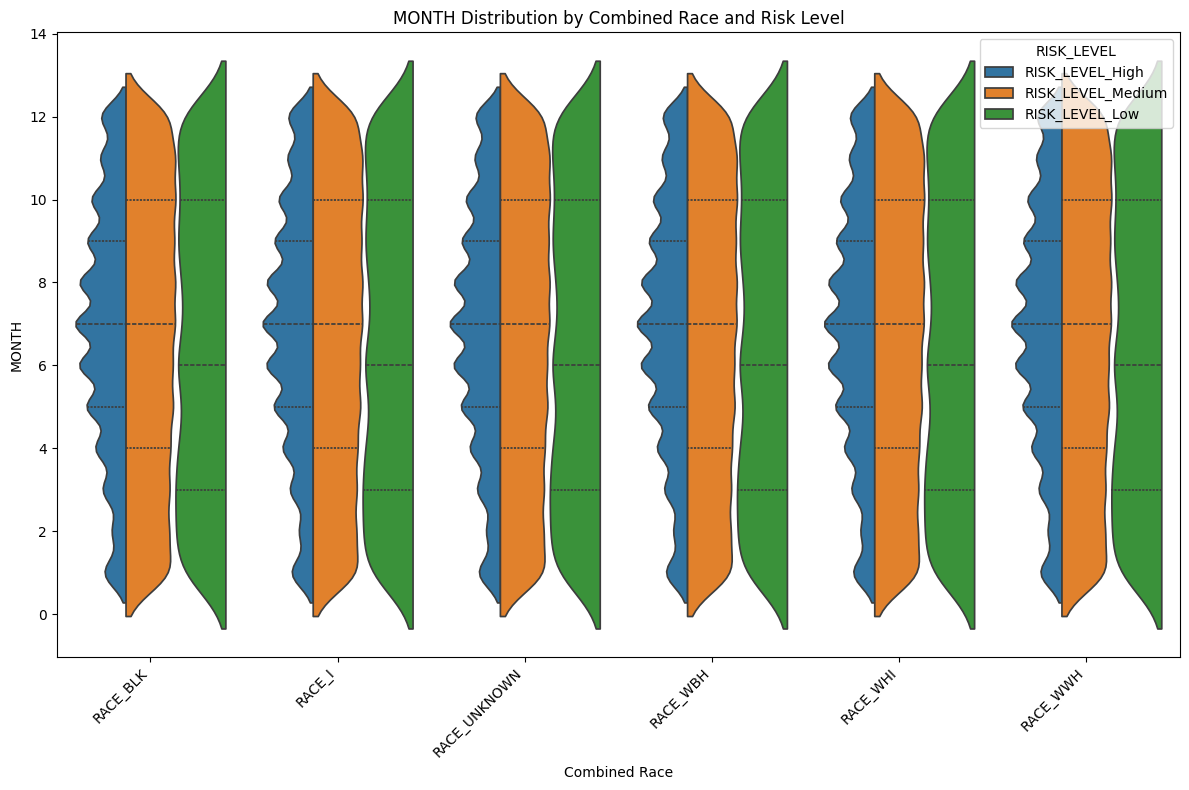

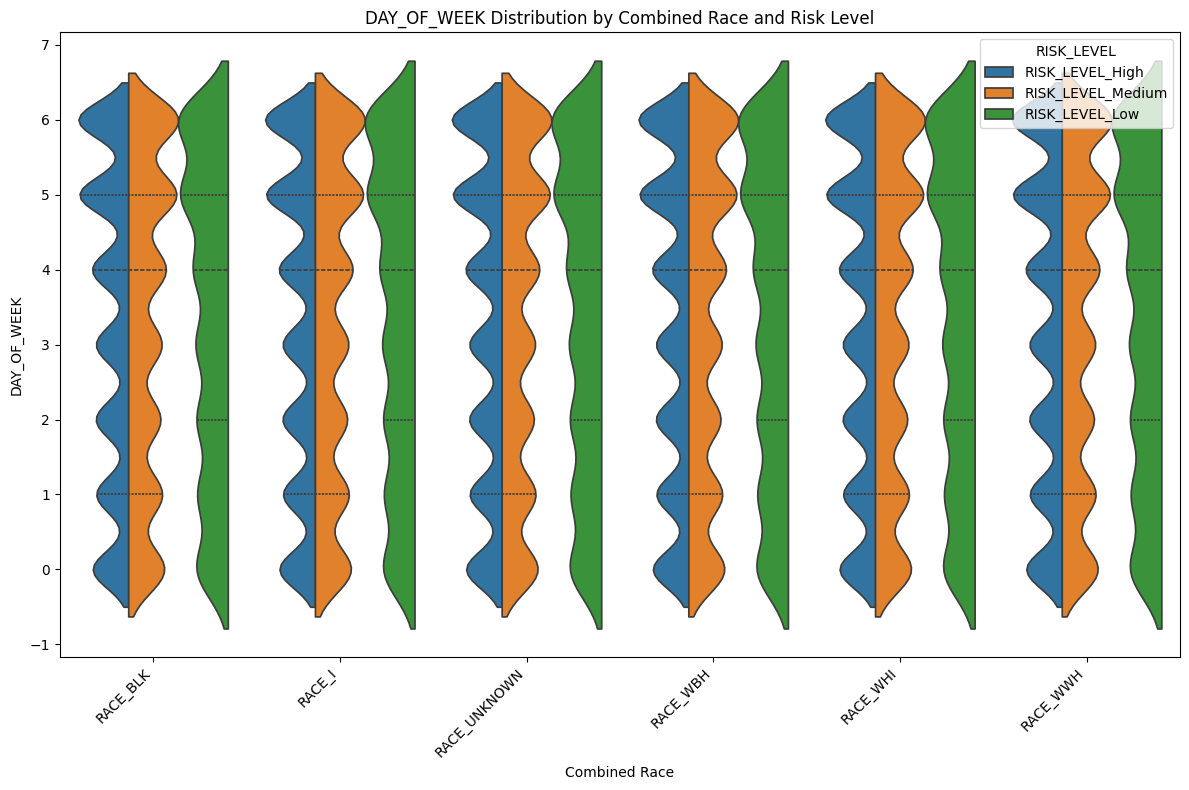

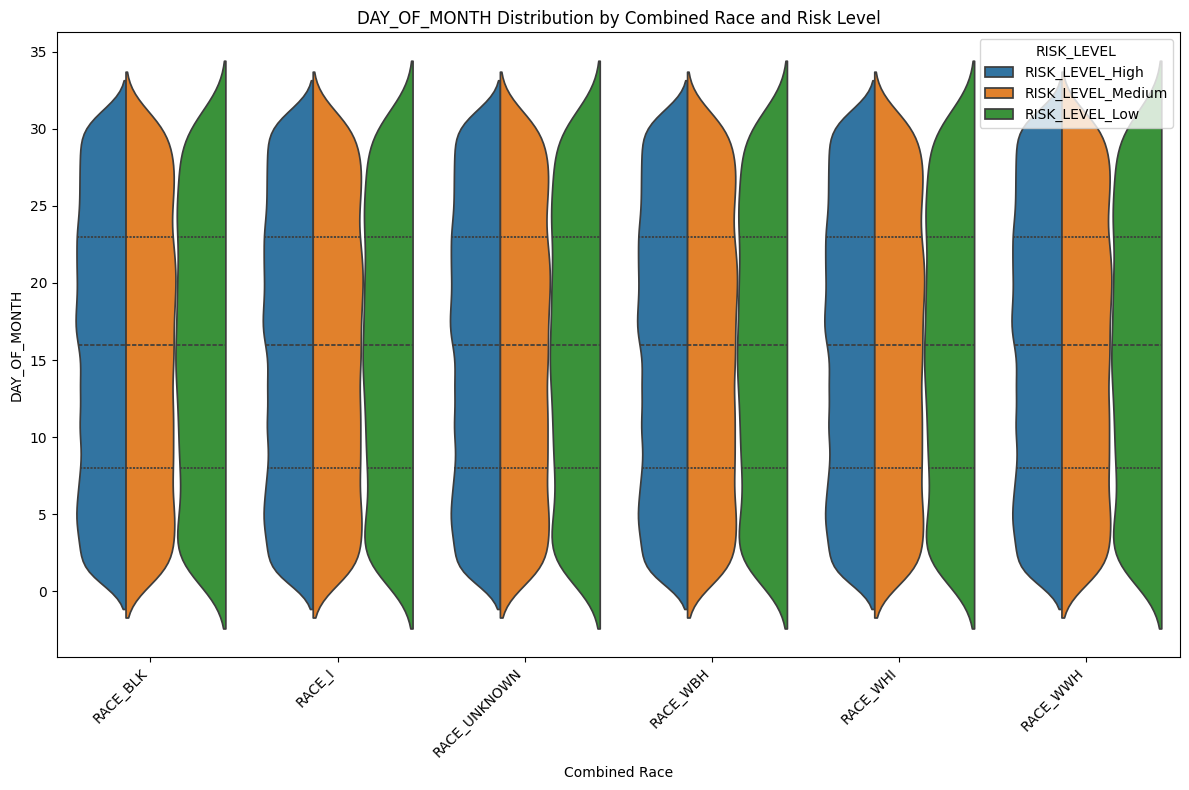

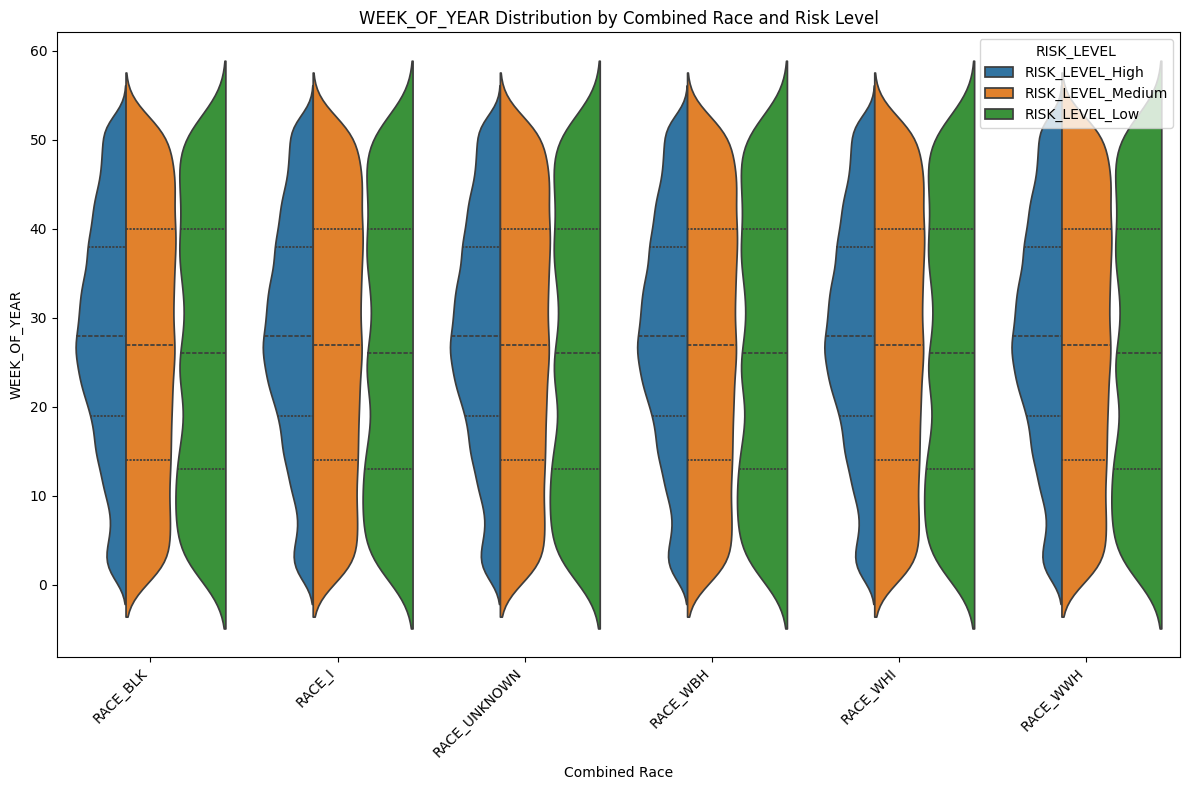

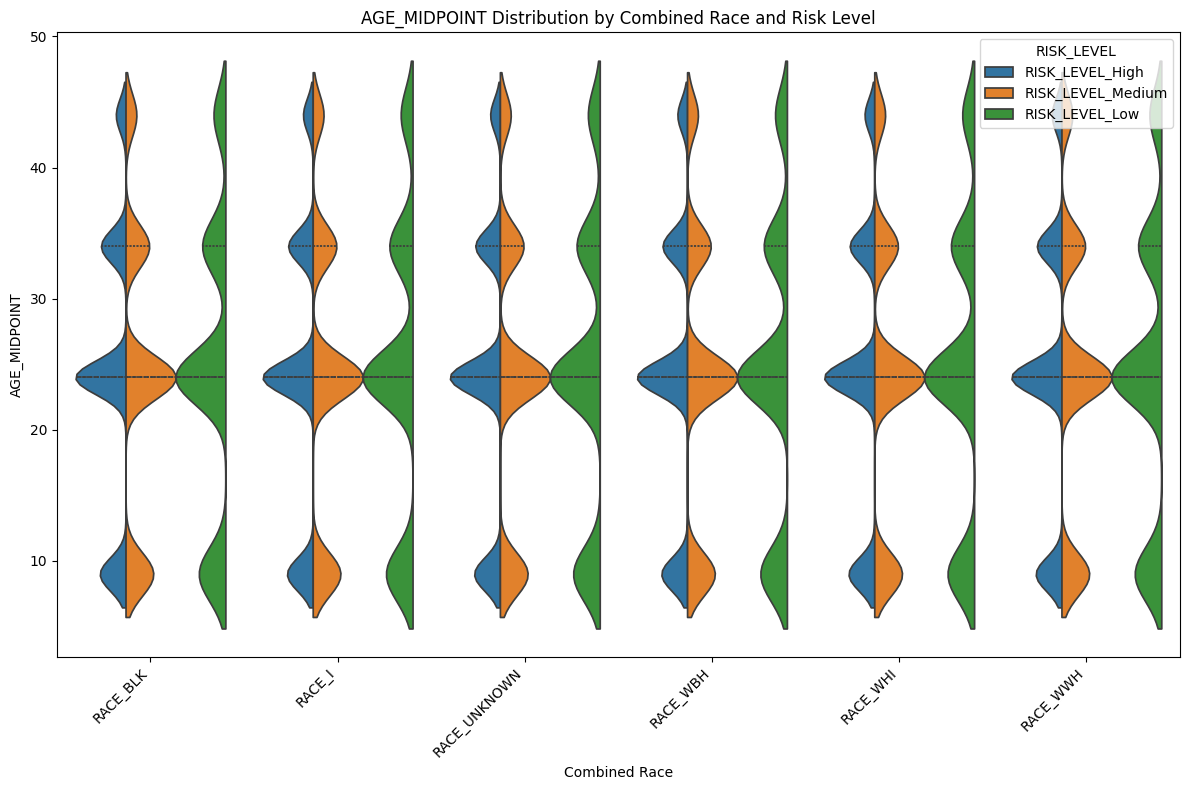

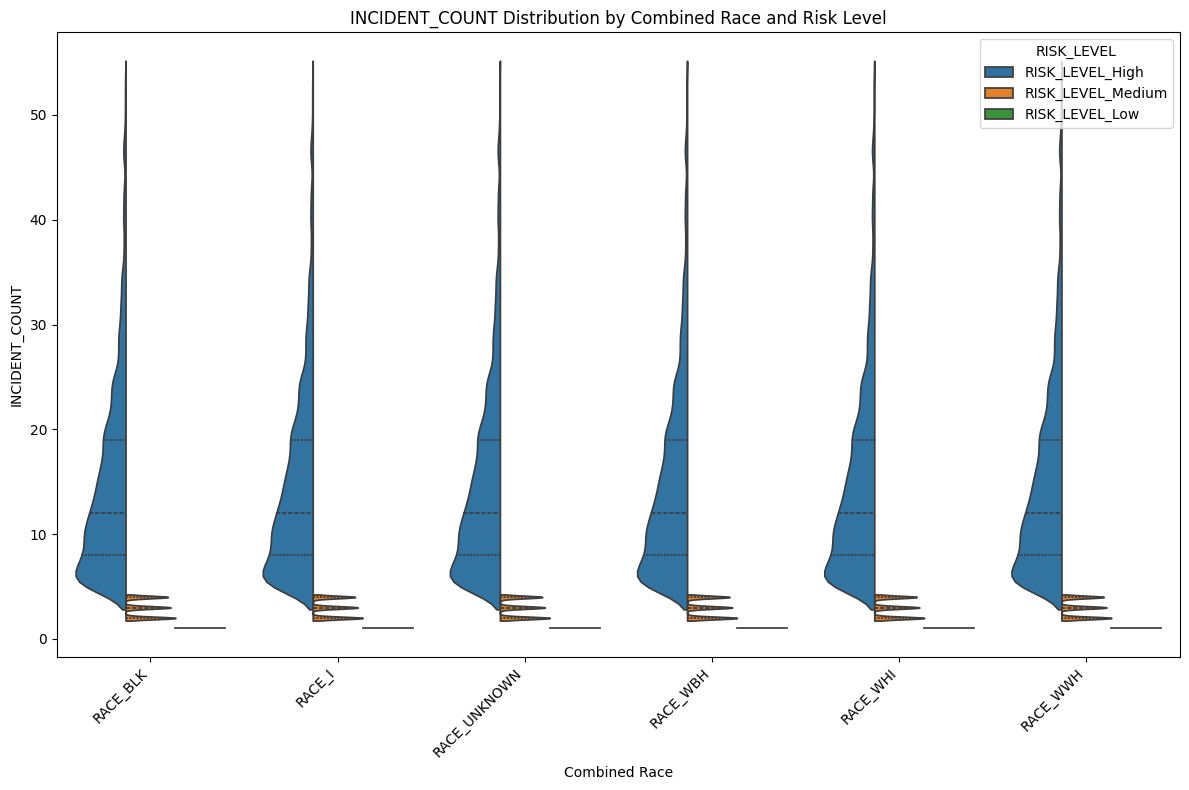

In [68]:
race_columns = [
    'RACE_BLK',
    'RACE_I',
    'RACE_UNKNOWN',
    'RACE_WBH',
    'RACE_WHI',
    'RACE_WWH'
]

numerical_features = ['YEAR', 'MONTH', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'WEEK_OF_YEAR', 'AGE_MIDPOINT', 'INCIDENT_COUNT']  

if all(col in Violence_Reduction_df.columns for col in race_columns):

    df_melted = pd.melt(Violence_Reduction_df, id_vars=['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low'] + numerical_features, value_vars=race_columns, var_name='RACE', value_name='Count')  

    df_melted['RISK_LEVEL'] = df_melted[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].idxmax(axis=1)

    for num_feature in numerical_features: 
        if num_feature in df_melted.columns:  
            plt.figure(figsize=(12, 8))
            sns.violinplot(x='RACE', y=num_feature, hue='RISK_LEVEL', data=df_melted, split=True, inner="quart")  
            plt.title(f'{num_feature} Distribution by Combined Race and Risk Level')
            plt.xlabel('Combined Race')
            plt.ylabel(num_feature)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
else:
    print("Not all required race columns found in DataFrame.")

#### 2.6.9. Line Graph for VICTIMIZATION_PRIMARY Types :

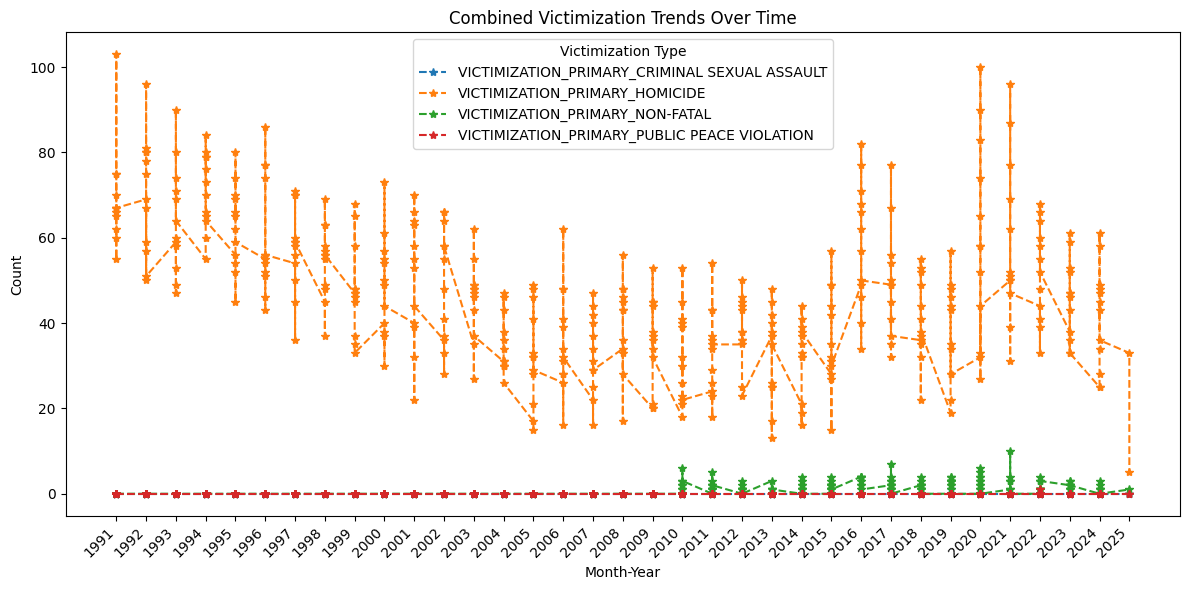

In [69]:
victimization_columns = [
    'VICTIMIZATION_PRIMARY_CRIMINAL SEXUAL ASSAULT',
    'VICTIMIZATION_PRIMARY_HOMICIDE',
    'VICTIMIZATION_PRIMARY_NON-FATAL',
    'VICTIMIZATION_PRIMARY_PUBLIC PEACE VIOLATION'
]

if all(col in Violence_Reduction_df.columns for col in victimization_columns):

    df_melted = pd.melt(Violence_Reduction_df, id_vars=['YEAR','MONTH'], value_vars=victimization_columns, var_name='VICTIMIZATION_PRIMARY', value_name='Count')

    combined_counts = df_melted.groupby(['YEAR', 'MONTH', 'VICTIMIZATION_PRIMARY'])['Count'].sum().reset_index()

    plt.figure(figsize=(12, 6))  

    for victimization_type in combined_counts['VICTIMIZATION_PRIMARY'].unique(): 
        data = combined_counts[combined_counts['VICTIMIZATION_PRIMARY'] == victimization_type].sort_values(['YEAR', 'MONTH'])
        plt.plot(data['YEAR'].astype(str), data['Count'],marker='*',linestyle='--', label=victimization_type) 
    plt.title('Combined Victimization Trends Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Victimization Type')
    plt.tight_layout()
    plt.show()

else:
    print("Not all required victimization columns found in DataFrame.")

#### 2.6.10. Stacked Bar Chart for LOCATION_GROUP :

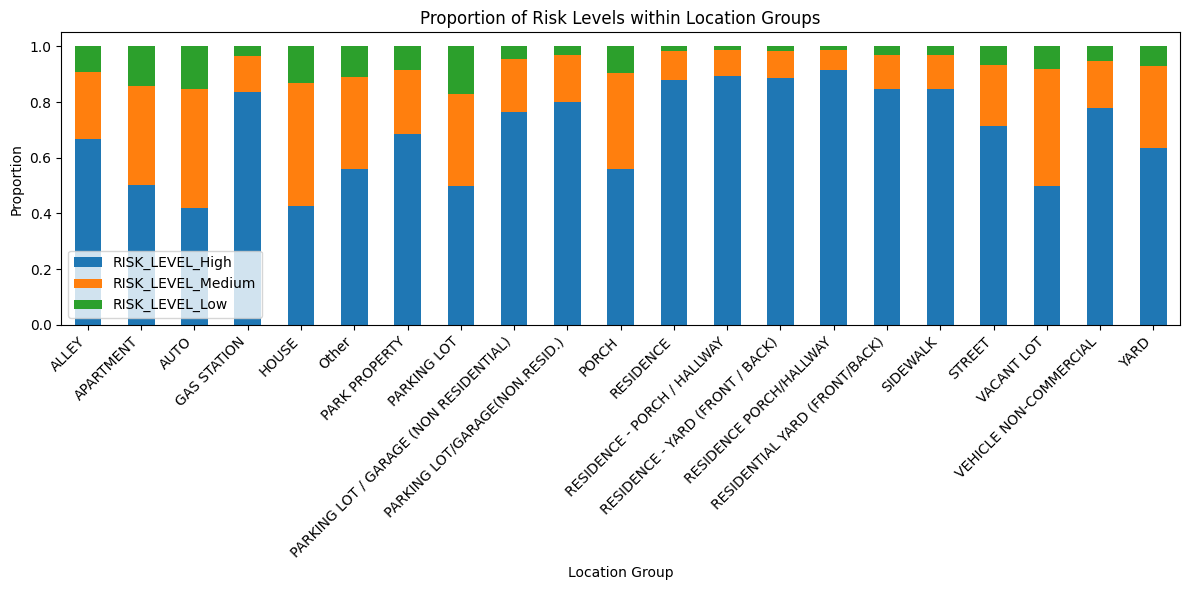

In [70]:
# Get the top N most frequent locations
top_n = 20  # Adjust as needed
top_locations = Violence_Reduction_df['LOCATION_DESCRIPTION'].value_counts().nlargest(top_n).index

# Create a 'LOCATION_GROUP' column.
Violence_Reduction_df['LOCATION_GROUP'] = Violence_Reduction_df['LOCATION_DESCRIPTION'].apply(lambda loc: loc if loc in top_locations else 'Other')

location_risk_counts = Violence_Reduction_df.groupby('LOCATION_GROUP')[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].sum()
location_risk_proportions = location_risk_counts.div(location_risk_counts.sum(axis=1), axis=0)

location_risk_proportions.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Risk Levels within Location Groups')
plt.xlabel('Location Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 2.6.11. Bar Chart for Proportion of Risk Levels by Sex :

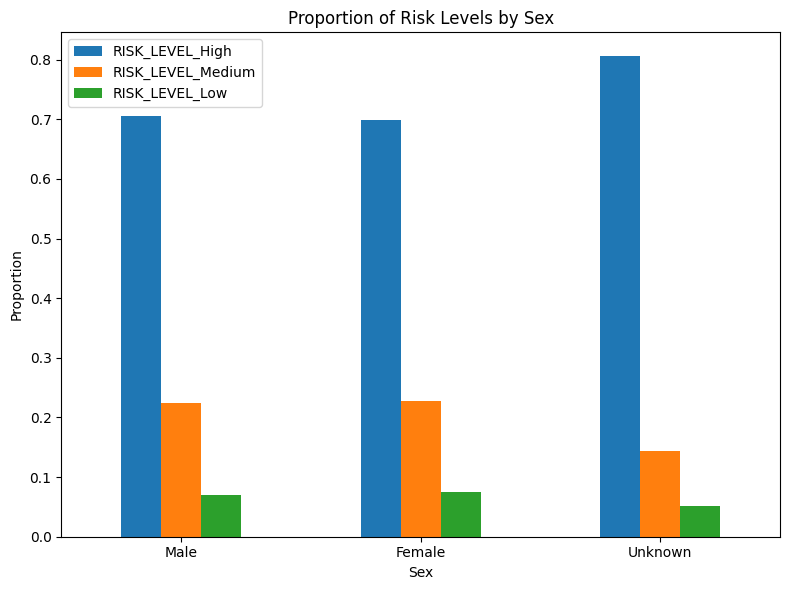

In [71]:
Violence_Reduction_df['SEX'] = pd.NA 

Violence_Reduction_df.loc[Violence_Reduction_df['SEX_M'] == 1, 'SEX'] = 'Male'
Violence_Reduction_df.loc[Violence_Reduction_df['SEX_M'] == 0, 'SEX'] = 'Female'
if 'SEX_UNKNOWN' in Violence_Reduction_df.columns:
    Violence_Reduction_df.loc[Violence_Reduction_df['SEX_UNKNOWN'] == 1, 'SEX'] = 'Unknown'

sex_categories = ['Male', 'Female', 'Unknown'] 
Violence_Reduction_df['SEX'] = pd.Categorical(Violence_Reduction_df['SEX'], categories=sex_categories)

sex_risk_counts = Violence_Reduction_df.groupby('SEX')[['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low']].sum()
sex_risk_proportions = sex_risk_counts.div(sex_risk_counts.sum(axis=1), axis=0)

sex_risk_proportions.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Proportion of Risk Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 2.. Separate Features (X) and Target (y) :

In [72]:
X = Violence_Reduction_df.drop(['RISK_LEVEL_High', 'RISK_LEVEL_Medium', 'RISK_LEVEL_Low','RISK_LEVEL_Numeric'], axis=1, errors='ignore')
y = Violence_Reduction_df[['RISK_LEVEL_Numeric']]

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54484 entries, 0 to 54483
Data columns (total 80 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   DATE                                           54484 non-null  datetime64[ns]
 1   LATITUDE                                       54484 non-null  float64       
 2   LONGITUDE                                      54484 non-null  float64       
 3   LOCATION_DESCRIPTION                           54484 non-null  object        
 4   GUNSHOT_INJURY                                 54484 non-null  int32         
 5   AGE_MIDPOINT                                   54484 non-null  int32         
 6   VICTIMIZATION_PRIMARY_CRIMINAL SEXUAL ASSAULT  54484 non-null  int32         
 7   VICTIMIZATION_PRIMARY_HOMICIDE                 54484 non-null  int32         
 8   VICTIMIZATION_PRIMARY_NON-FATAL                54484 non

In [74]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54484 entries, 0 to 54483
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   RISK_LEVEL_Numeric  54484 non-null  int32
dtypes: int32(1)
memory usage: 213.0 KB


In [75]:
y.head()

RISK_LEVEL_Numeric
0                   0
1                   0
2                   0
3                   0
4                   2

In [76]:
# Separate numerical and categorical columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [77]:
# Define preprocessors
num_transformer = StandardScaler()  # minmaxscaler for numerical features
cat_transformer = OneHotEncoder(handle_unknown='ignore')   # onehot encoder for categorical features

In [78]:
# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_col', num_transformer, num_features),
        ('cat_col', cat_transformer, cat_features)
    ]
)

### 2.8. Splitting and scaling the dataset :

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [80]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43587, 80)
X_test shape: (10897, 80)
y_train shape: (43587, 1)
y_test shape: (10897, 1)


In [81]:
y.value_counts()

RISK_LEVEL_Numeric
0                     38476
2                     12178
1                      3830
Name: count, dtype: int64

##### *** To solve the class imbalance issue we implement a SMOTE (Synthetic Minority Over-sampling Technique)

#### 2.8.1. Dataset Balancing (SMOTEENN):

In [82]:
smotee = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smotee.fit_resample(X_train_scaled, y_train)

In [83]:
print(X_train_balanced.shape[0])

89175


In [84]:
print(y_train_balanced.shape[0])

89175
